# 1. Introduction


This project analyzes a **JD E-Commerce Consumer Behavior** dataset consisting of **183,828 records** and **20 structured features** from **February 1st, 2018 to April 15th, 2018**.

Each record represents a single instance of **user behavior**, such as a **page view**, **add to cart**, or **purchase** action, tied to a specific product and timestamp.  

The dataset offers a comprehensive view of customer interaction patterns by integrating:

- **User profile data**, including:
  - Age group  
  - Gender  
  - Registration date  
  - Membership level  
  - City tier  

- **Behavioral data**, including:
  - Type of action  
  - Action date  
  - Unique action identifier  

- **Product and shop information**, such as:
  - Product brand and category  
  - Product launch date  
  - Shop details (number of followers, VIP members, shop category, average customer rating)  

By analyzing this dataset, we aim to:
- Uncover insights into **customer purchasing behavior**  
- Identify key trends in **user engagement** across demographic groups and time periods  
- Develop **data-driven recommendations** to support:
  - Operational strategy  
  - Targeted marketing  
  - Customer experience improvements on the JD platform  

## Field Descriptions

| Field Name              | Type     | Description                                                  |
|------------------------|----------|--------------------------------------------------------------|
| `customer_id`          | Bigint   | Unique identifier of the customer                           |
| `product_id`           | Bigint   | Unique identifier of the product                            |
| `action_date`          | Date     | Date of the customer's action                               |
| `action_id`            | Bigint   | Action code or identifier                                   |
| `type`                 | String   | Type of action (e.g., view, cart, purchase, favorite)       |
| `age_range`            | Int      | Age group of the customer                                   |
| `gender`               | String   | Gender of the customer                                      |
| `customer_register_date` | Date  | Date when the customer registered                          |
| `customer_level`       | Int      | Membership level of the customer                            |
| `city_level`           | Int      | City tier of the customer                                   |
| `brand`                | String   | Product brand                                               |
| `shop_id`              | Bigint   | Unique identifier of the shop                               |
| `category`             | String   | Product category                                            |
| `product_market_date`  | Date     | Date when the product was launched                          |
| `vender_id`            | Bigint   | Vendor or merchant code                                     |
| `fans_number`          | Int      | Number of followers of the shop                             |
| `vip_number`           | Int      | Number of VIP customers of the shop                         |
| `shop_register_date`   | Date     | Date when the shop was registered                           |
| `shop_category`        | String   | Main category or focus of the shop                          |
| `shop_score`           | Float    | Average customer rating of the shop                         |


# 2. Data Preprocessing

In [1]:
%pip install squarify 
import squarify
import numpy as np
from datetime import datetime
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from dateutil.relativedelta import relativedelta
import warnings
%pip install pyecharts
from pyecharts import options as opts
from pyecharts.charts import Funnel
import math
warnings.filterwarnings('ignore')

# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F',
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme

%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['figure.dpi'] = 80
%config InlineBackend.figure_format = 'retina'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_excel('JD_consumer_data.xlsx',sheet_name=0)
df.head()

customer_id  product_id         action_date  action_id      type  \
0       976695      328360 2018-03-05 08:52:00   10633744  PageView   
1       395399      141632 2018-03-20 10:55:00    5472028  PageView   
2      1068082        5924 2018-04-01 13:56:00    3853455  PageView   
3      1068082       10723 2018-04-01 13:45:00    3853455  PageView   
4       735392        4559 2018-02-06 20:25:00    9434940  PageView   

   age_range gender customer_register_date  customer_level  city_level  \
0        5.0      W             2017-06-17               6         3.0   
1        4.0      M             2018-01-21               6         5.0   
2        6.0      W             2012-08-13               1         4.0   
3        6.0      W             2012-08-13               1         4.0   
4        6.0      M             2009-09-15               7         5.0   

     brand  shop_id    category product_market_date  vender_id  fans_number  \
0  LukFook     2959    Bracelet          2017-10-05       4322         1159   
1   illuma     4203  Milk Power          2015-06-12       3563         2411   
2  Li-Ning     8002   Badminton          2013-06-14       1457       213610   
3  Li-Ning     8002   Badminton          2011-07-19       1457       213610   
4    Other     6944      Cookie          2015-11-16        355        63969   

   vip_number shop_register_date          shop_category  shop_score  
0       36596         2017-07-04  Jewellery Accessories    9.043610  
1       65893         2013-08-08      Mother and Infant    9.537151  
2      357580         2013-05-23         Outdoor Sports    9.571139  
3      357580         2013-05-23         Outdoor Sports    9.571139  
4       85597         2014-10-31                   Food    9.665680

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183828 entries, 0 to 183827
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   customer_id             183828 non-null  int64         
 1   product_id              183828 non-null  int64         
 2   action_date             183828 non-null  datetime64[ns]
 3   action_id               183828 non-null  int64         
 4   type                    183828 non-null  object        
 5   age_range               183745 non-null  float64       
 6   gender                  183828 non-null  object        
 7   customer_register_date  183828 non-null  datetime64[ns]
 8   customer_level          183828 non-null  int64         
 9   city_level              183703 non-null  float64       
 10  brand                   183828 non-null  object        
 11  shop_id                 183828 non-null  int64         
 12  category                183828

## 2.1 Handling missing data

In [4]:
df.isnull().sum()

customer_id                   0
product_id                    0
action_date                   0
action_id                     0
type                          0
age_range                    83
gender                        0
customer_register_date        0
customer_level                0
city_level                  125
brand                         0
shop_id                       0
category                      0
product_market_date           0
vender_id                     0
fans_number                   0
vip_number                    0
shop_register_date        71354
shop_category                 0
shop_score                    0
dtype: int64

In [5]:
percentage_missing = (df.isnull().mean() * 100).round(2)
print(percentage_missing)

customer_id                0.00
product_id                 0.00
action_date                0.00
action_id                  0.00
type                       0.00
age_range                  0.05
gender                     0.00
customer_register_date     0.00
customer_level             0.00
city_level                 0.07
brand                      0.00
shop_id                    0.00
category                   0.00
product_market_date        0.00
vender_id                  0.00
fans_number                0.00
vip_number                 0.00
shop_register_date        38.82
shop_category              0.00
shop_score                 0.00
dtype: float64




There is some missing data in the `age_range` and `city_level` fields. However, the proportion of missing values is less than **0.01%**, which is negligible and unlikely to distort the overall customer demographics analysis. Therefore, these missing values are **ignored** in subsequent visualizations and analysis.

Approximately **39%** of the `shop_register_date` field is missing. Since this field is **not central** to our current analysis objectives, **no imputation strategy** is applied at this stage.


## 2.2 Feature Grouping Strategy

Considering the wide range of features (20 in total), and the varying levels of granularity and context (e.g., user-level, product-level, behavior-level), we grouped the features into four meaningful categories to better structure our analysis:

In [6]:
user_info = [
    'customer_id', 'age_range', 'gender',
    'customer_register_date', 'customer_level', 'city_level'
]

behavior_data = [
    'action_id', 'type', 'action_date'
]

product_info = [
    'product_id', 'brand', 'category',
    'product_market_date', 'vender_id'
]

shop_info = [
    'shop_id', 'shop_category', 'fans_number',
    'vip_number', 'shop_register_date', 'shop_score'
]


### Grouped Feature Table

| Category             | Field Name               | Description                                           |
|----------------------|--------------------------|-------------------------------------------------------|
| **User Profile Data**| `customer_id`            | Unique identifier of the customer                    |
|                      | `age_range`              | Age group of the customer                            |
|                      | `gender`                 | Gender of the customer                               |
|                      | `customer_register_date` | Date when the customer registered                    |
|                      | `customer_level`         | Membership level of the customer                     |
|                      | `city_level`             | City tier of the customer                            |
| **User Behavior Data**| `action_date`           | Date of the customer's action                        |
|                      | `action_id`              | Action code or identifier                            |
|                      | `type`                   | Type of behavior (PageView, Order, etc.)             |
| **Product Data**     | `product_id`             | Unique identifier of the product                     |
|                      | `brand`                  | Brand of the product                                 |
|                      | `category`               | Product category                                     |
|                      | `product_market_date`    | Date when the product was launched                   |
|                      | `vender_id`              | Vendor or merchant code                              |
| **Shop Data**        | `shop_id`                | Unique identifier of the shop                        |
|                      | `shop_category`          | Main category or focus of the shop                   |
|                      | `fans_number`            | Number of followers of the shop                      |
|                      | `vip_number`             | Number of VIP customers of the shop                  |
|                      | `shop_register_date`     | Date when the shop was registered                    |
|                      | `shop_score`             | Average customer rating of the shop                  |


# 3. Exploratory data analysis

## 3.1 User Profile Data	

In [7]:


# Drop duplicate rows based on customer_id
user_info = df[user_info].drop_duplicates(subset='customer_id')

user_info

customer_id  age_range gender customer_register_date  customer_level  \
0            976695        5.0      W             2017-06-17               6   
1            395399        4.0      M             2018-01-21               6   
2           1068082        6.0      W             2012-08-13               1   
4            735392        6.0      M             2009-09-15               7   
5           1093882        5.0      M             2014-05-28               7   
...             ...        ...    ...                    ...             ...   
183821       314592        6.0      W             2011-05-23               7   
183822       926824        5.0      W             2014-05-19               5   
183823      1548316        5.0      M             2016-12-24               1   
183826      1057196        6.0      W             2017-10-12               6   
183827        67145        2.0      W             2012-11-06               7   

        city_level  
0              3.0  
1              5.0  
2              4.0  
4              5.0  
5              4.0  
...            ...  
183821         4.0  
183822         4.0  
183823         1.0  
183826         4.0  
183827         3.0  

[140715 rows x 6 columns]

### Age Distribution

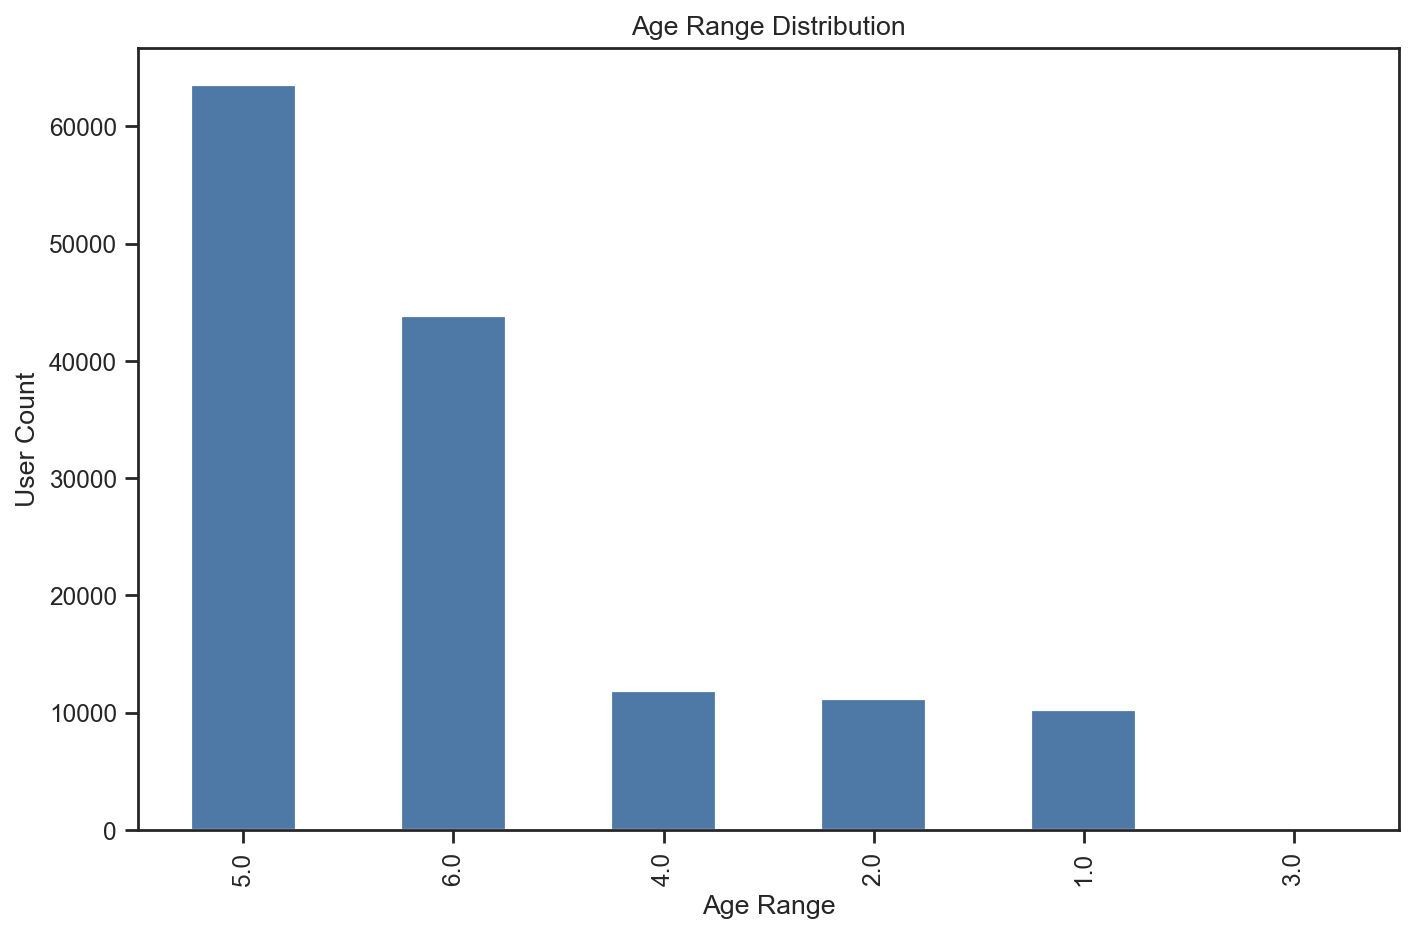

In [8]:
user_info['age_range'].value_counts().sort_values(ascending=False).plot(
    kind='bar',
    title='Age Range Distribution',
    xlabel='Age Range',
    ylabel='User Count'
)
plt.tight_layout() 
plt.savefig('age_range_distribution.png', dpi=300)  
plt.show()


The majority of users fall into age ranges 5 and 6, indicating that JD.com's user base is largely composed of **middle-aged and older consumers**, while younger age groups are less represented.


### Gender distribution

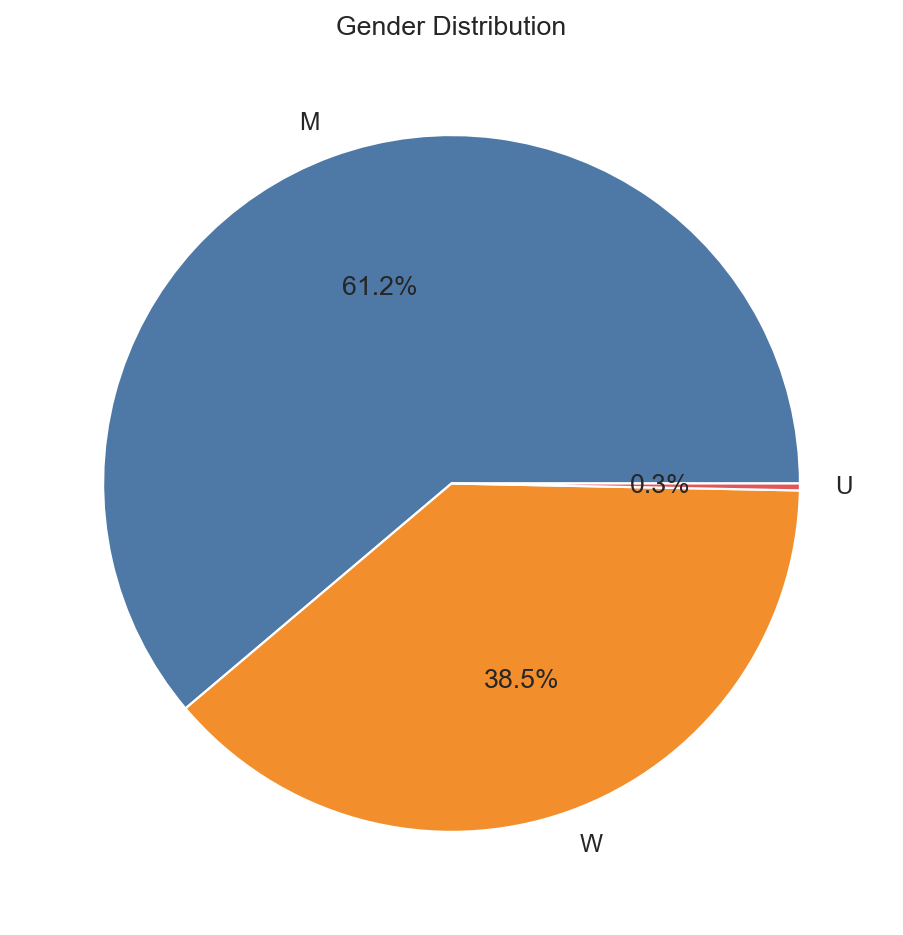

In [9]:
user_info['gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Gender Distribution',
    ylabel=''  
)
plt.tight_layout()  # Optional: improves layout
plt.savefig('gender_distribution.png', dpi=300)  # Save as PNG
plt.show()


Approximately **61% of users are male** and **39% are female**.


### Registration trend over time

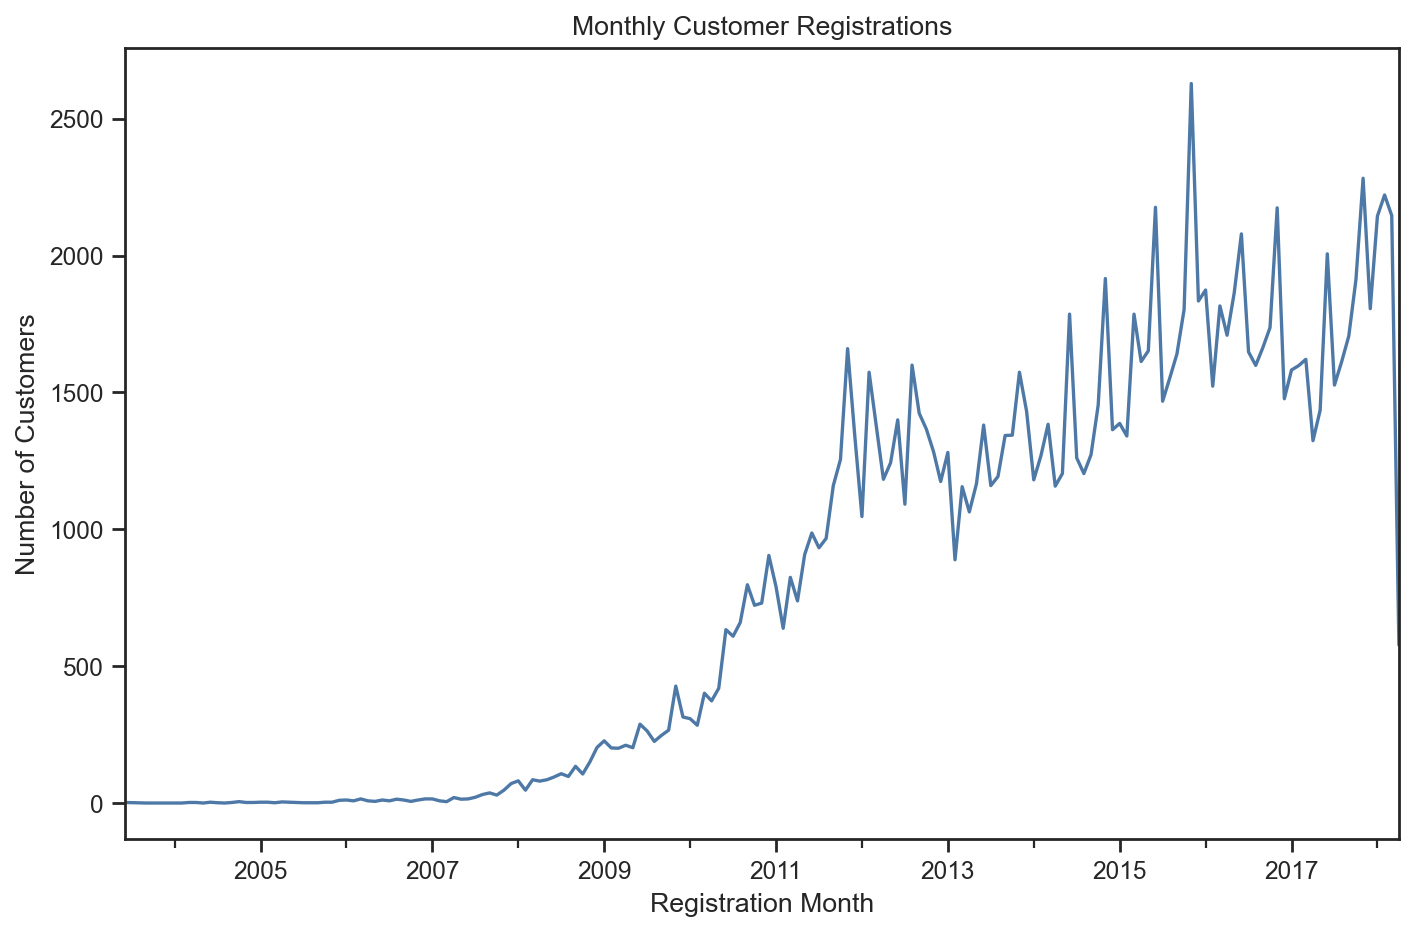

In [10]:
user_info['customer_register_date'].dt.to_period('M').value_counts().sort_index().plot(
    title='Monthly Customer Registrations')
plt.xlabel('Registration Month')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('monthly_customer_registrations.png', dpi=300)
plt.show()


The platform shows a **consistently strong growth trend**, with the number of registered users **increasing every year from 2013 onward**, indicating steady expansion and rising user adoption over time.


### City Level Distribution

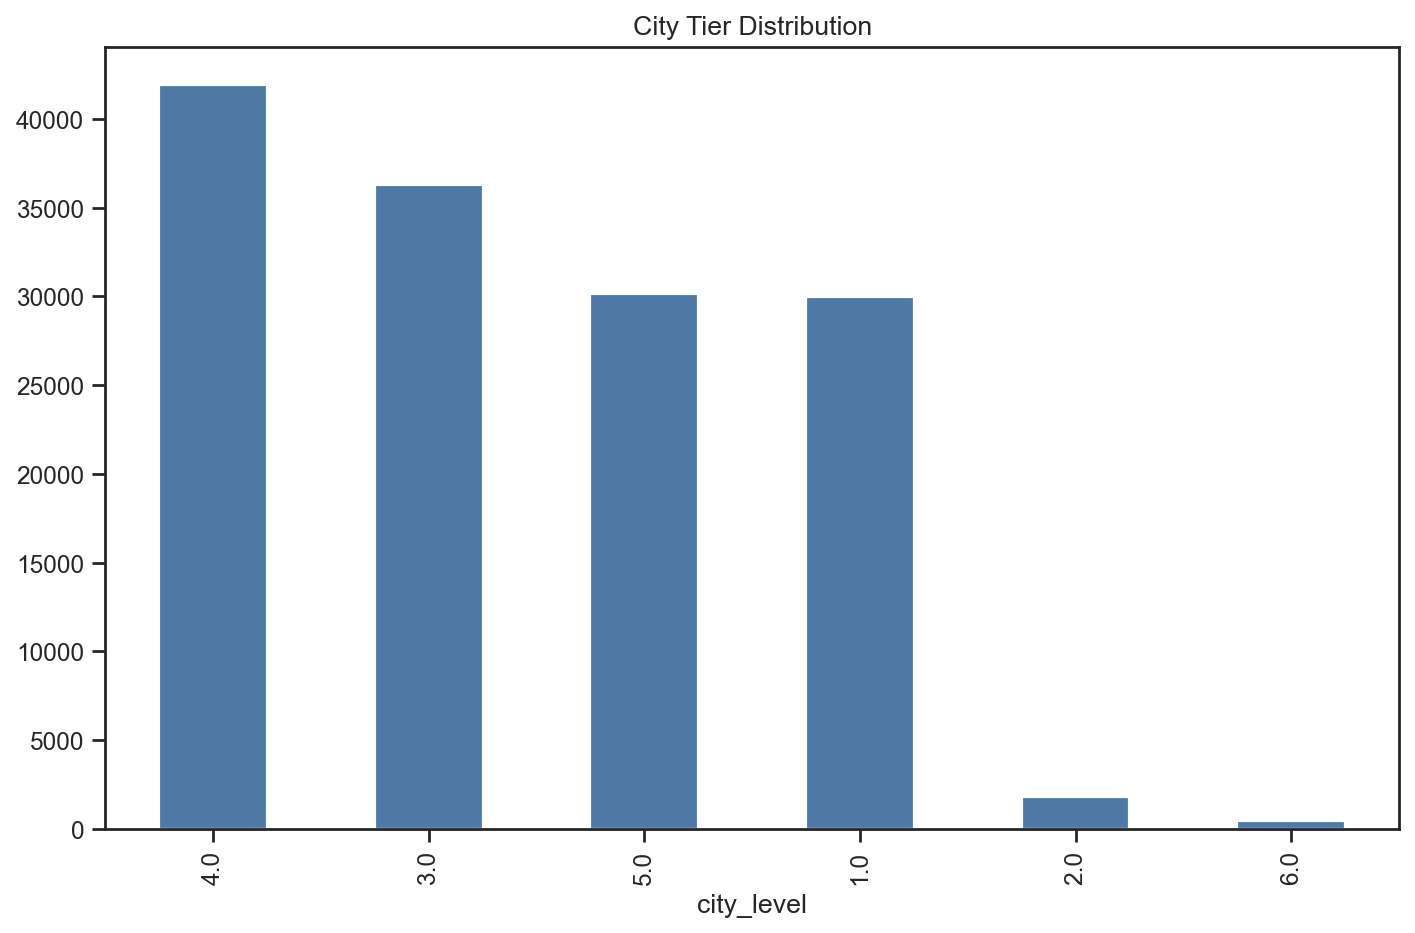

In [11]:
user_info['city_level'].value_counts().sort_values(ascending=False).plot(kind='bar', title='City Tier Distribution')
plt.tight_layout()
plt.savefig('city_tier_distribution.png', dpi=300)
plt.show()


The majority of users are from **lower-tier cities**, particularly **Tier 4 and Tier 3**, which together account for the largest portion of the customer base.

### Customer Level Distribution

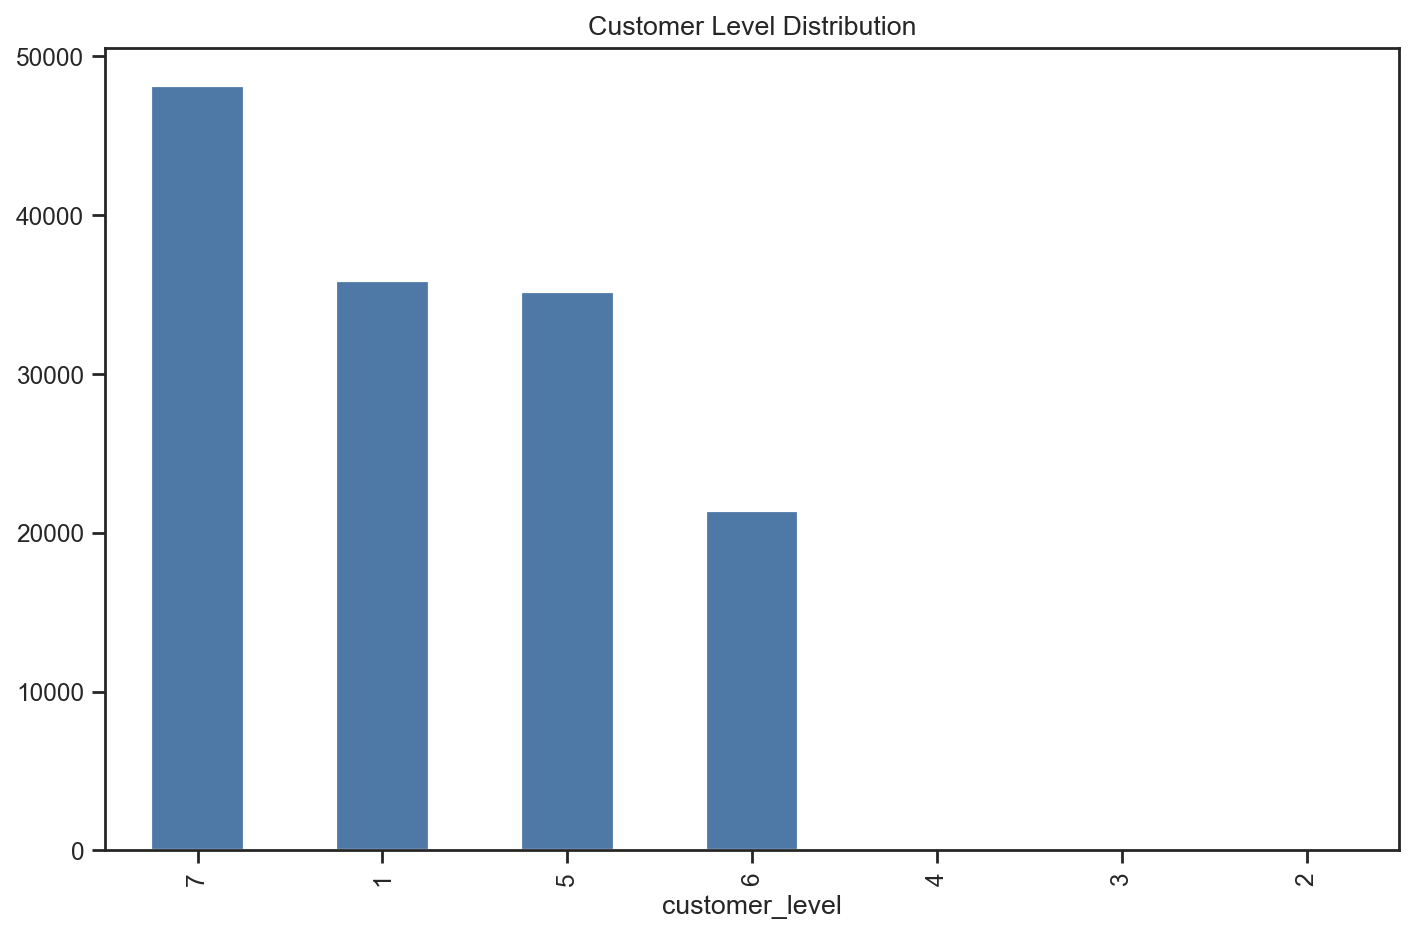

In [12]:
user_info['customer_level'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Customer Level Distribution')
plt.tight_layout()
plt.savefig('customer_level_distribution.png', dpi=300)
plt.show()

Most customers belong to **membership level 7**, followed by levels **1** and **5**.

### Insights: User Profile Analysis

In [13]:
summary = {
    'Unique Customers': user_info['customer_id'].nunique(),
    'Most Common Age Group': user_info['age_range'].mode()[0],
    'Gender Ratio (F/M)': round(user_info['gender'].value_counts(normalize=True)['W'] /
                                user_info['gender'].value_counts(normalize=True)['M'], 2),
    'Most Common City Level': user_info['city_level'].mode()[0]
}
pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])


Value
Unique Customers        140715.00
Most Common Age Group        5.00
Gender Ratio (F/M)           0.63
Most Common City Level       4.00



This analysis is based on a dataset of **140,715 unique customers** and reveals several important characteristics about JD.com’s user base.

---

## 1. Demographic Insights

### Age Distribution  
The majority of users fall within **Age Group 5 (35–39 years old)**, followed by **Age Group 6 (40 and above)**. Younger users under 30 are underrepresented.   

JD.com’s primary audience consists of **middle-aged adults**, who typically have higher purchasing power and brand loyalty. There may be challenges in attracting younger, more digitally native consumers.

### Gender Breakdown  
Approximately **61% of users are male**, with a **female-to-male ratio of 0.63**.  

JD.com’s user base skews male. This may reflect product offerings or marketing focus. There is potential to **expand female engagement** by diversifying product categories or tailoring promotions.

---

## 2. Geographic Distribution

### City Tier Penetration  
Users are heavily concentrated in **lower-tier cities**, especially **Tier 3 and Tier 4**, while Tier 1 and Tier 2 cities have fewer users.  

JD.com has successfully expanded into **less-saturated, emerging markets**. This advantage can be strengthened through **localized marketing and infrastructure investment**.

---

## 3. Customer Tier & Loyalty

### User Level Distribution  
The most common customer level is **Level 7**, indicating a loyal customer base. However, there are also significant proportions of users at **Level 1 (new)** and **Level 5 (mid-engagement)**.  

JD.com serves both **highly loyal and newly acquired users**. The company can enhance growth by **targeting onboarding strategies for new users** and **retention strategies for high-tier customers**.

---

## 4. Registration Trends

### Growth Over Time  
User registrations have shown **consistent growth from 2013 onward**, with no major declines.  

This steady trend suggests **increasing brand trust and market penetration**, providing a solid foundation for user segmentation and targeted marketing.

---

## Conclusion

JD.com’s customer base is characterized by:

- A dominant group of **middle-aged male users**
- Strong presence in **lower-tier cities**
- A healthy mix of **new and long-term loyal customers**
- **Steady registration growth** over time

### Recommendations for JD.com:

- **Attract younger and female users** through targeted campaigns and relevant product offerings  
- **Deepen presence in lower-tier cities** by enhancing logistics and local services  
- **Leverage demographic and engagement data** to personalize user experience and maximize customer lifetime value


## 3.2 Shop information

In [14]:
shop_info = df[shop_info].drop_duplicates(subset='shop_id')
shop_info

shop_id                shop_category  fans_number  vip_number  \
0          2959        Jewellery Accessories         1159       36596   
1          4203            Mother and Infant         2411       65893   
2          8002               Outdoor Sports       213610      357580   
4          6944                         Food        63969       85597   
5          4433                  Electronics            0           0   
...         ...                          ...          ...         ...   
183526     8405                         Food         6471       14499   
183546     4990  Household Eletric Appliance         5278      135098   
183721     9280                         Food        10694         676   
183745     8542  Household Eletric Appliance         6821       21659   
183781     6350  Household Eletric Appliance        29231       73699   

       shop_register_date  shop_score  
0              2017-07-04    9.043610  
1              2013-08-08    9.537151  
2              2013-05-23    9.571139  
4              2014-10-31    9.665680  
5                     NaT    0.000000  
...                   ...         ...  
183526         2017-06-28    9.787497  
183546         2016-04-15    9.472718  
183721         2018-03-10    9.663364  
183745         2017-08-07    9.488570  
183781         2015-01-30    9.328535  

[6086 rows x 6 columns]

In [15]:
#keep only the data with shop ratings greater than 0
shop_info=shop_info[shop_info['shop_score']>0]

### Shop Category Distribution

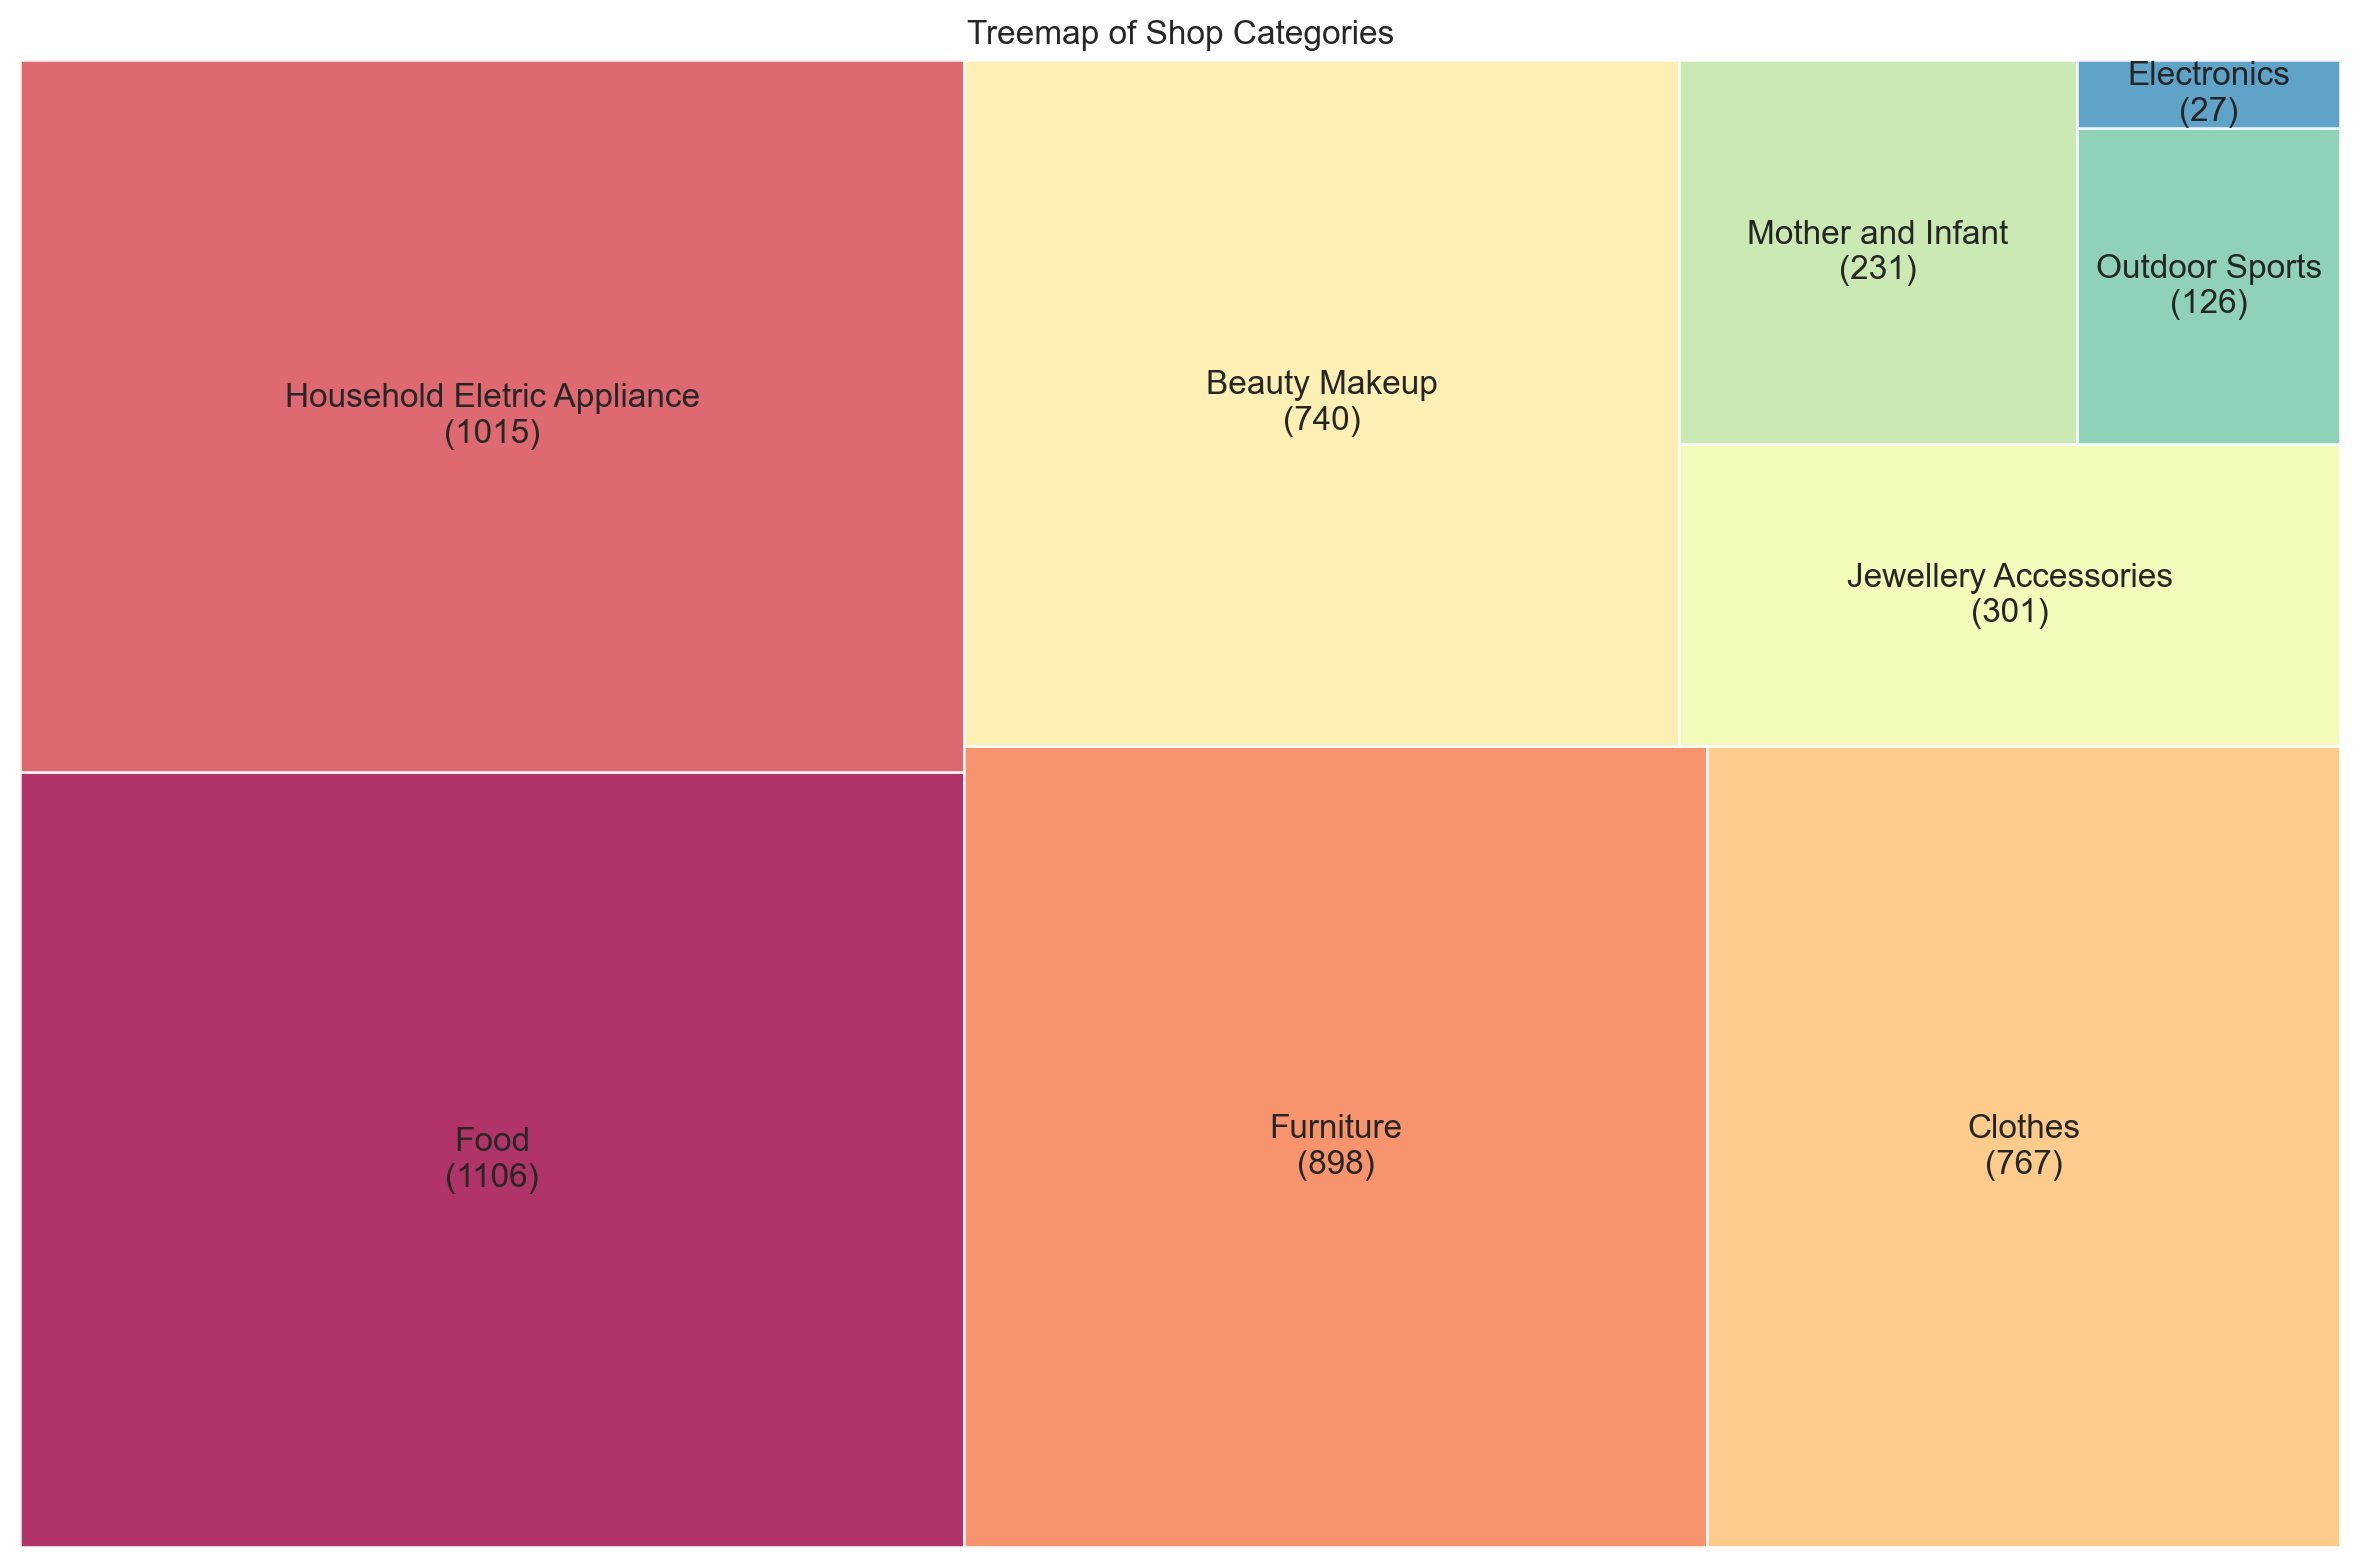

In [16]:

shop_df = shop_info.groupby('shop_category').size().reset_index(name='counts')
shop_df = shop_df.sort_values(by='counts', ascending=False)


labels = shop_df.apply(lambda x: f"{x['shop_category']}\n({x['counts']})", axis=1)
sizes = shop_df['counts'].tolist()
colors = [plt.cm.Spectral(i / len(labels)) for i in range(len(labels))]


plt.figure(figsize=(12, 8), dpi=100)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)


plt.title('Treemap of Shop Categories')
plt.axis('off')
plt.tight_layout()
plt.savefig('treemap_shop_category.png')



The platform has nine main categories of shops, with a **high concentration of shops in the "Food"** and **"Household Electric Appliance"** categories, followed by **"Furniture"**, **"Clothes" **, and **"Electronics"**.

### Shop Followers (Fans Number) Distribution

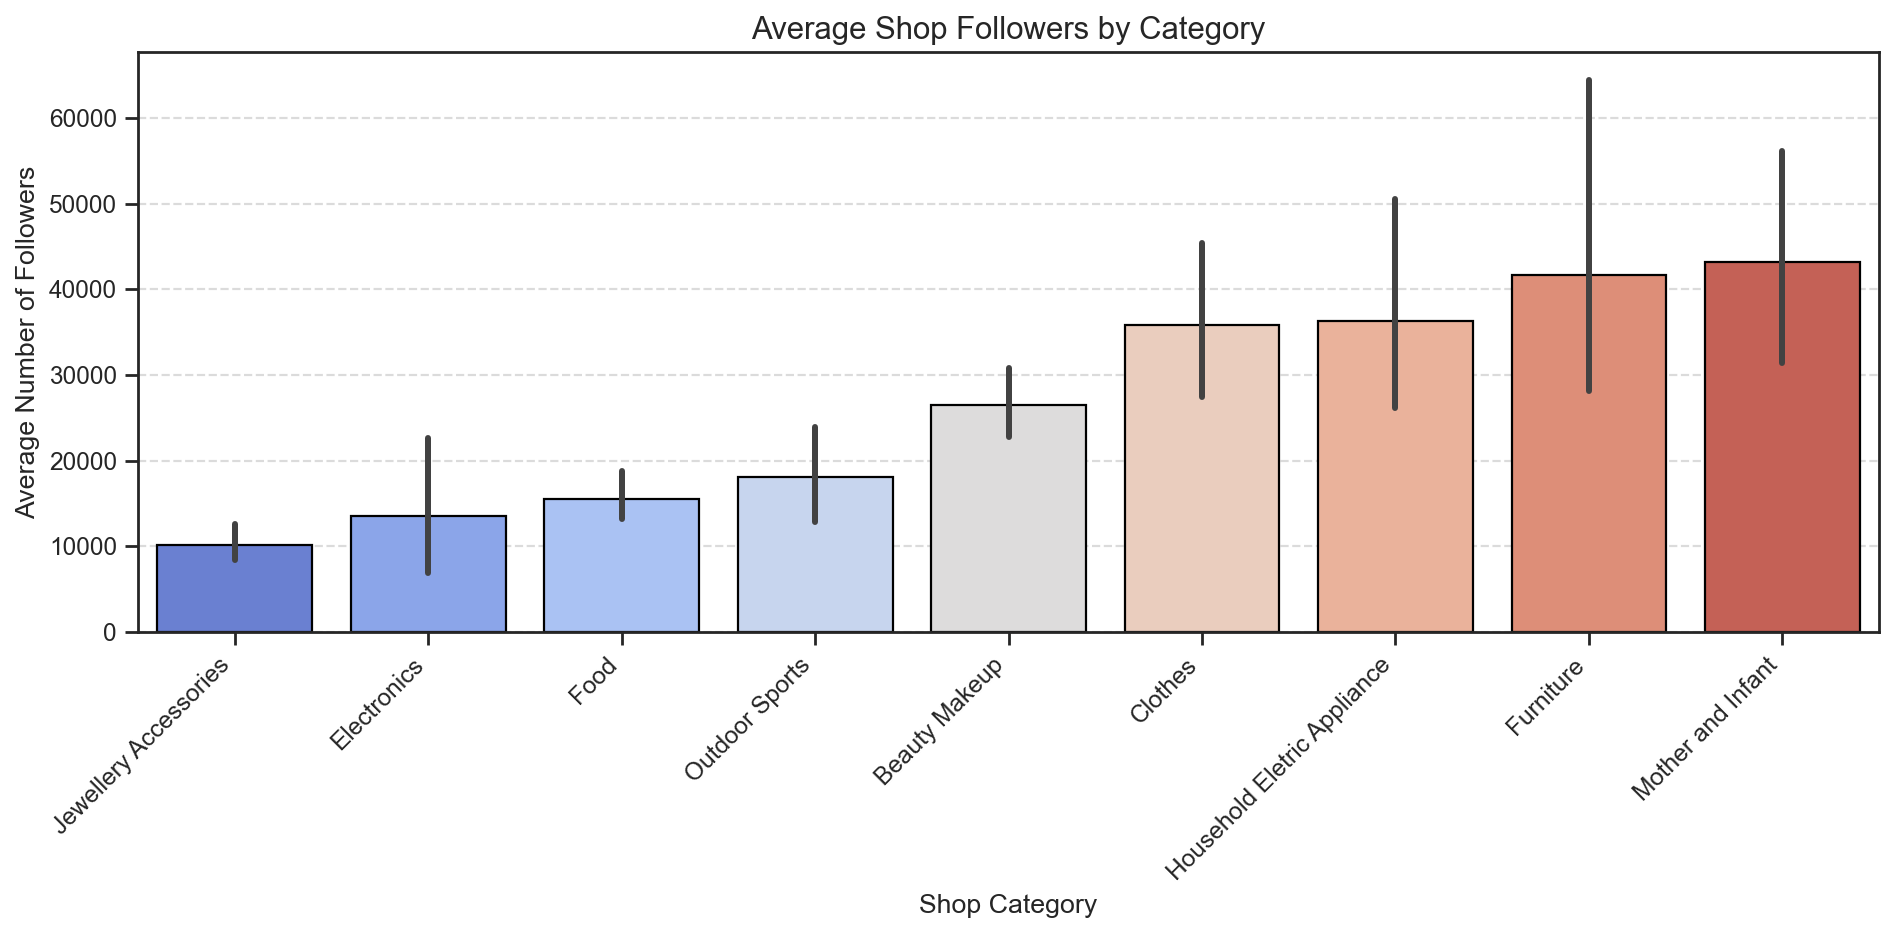

In [17]:


# Order categories by mean followers
shop_order = shop_info.groupby('shop_category')['fans_number'].mean().sort_values().index.tolist()


plt.figure(figsize=(12, 6))


sns.barplot(
    x='shop_category',
    y='fans_number',
    data=shop_info,
    order=shop_order,
    palette='coolwarm',         
    edgecolor='black'
)

plt.xticks(rotation=45, ha='right')


plt.title('Average Shop Followers by Category', fontsize=14)
plt.xlabel('Shop Category', fontsize=12)
plt.ylabel('Average Number of Followers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.savefig('average_shop_followers_by_category.png', dpi=300)
plt.show()




Shops in **Mother and Infant**, **Furniture**, and **Household Electric Appliance** categories have the highest average follower counts, indicating strong user engagement and brand attraction in these areas. In contrast, **Electronics** and **Jewellery Accessories** shops have the lowest average followers, possibly due to market saturation or low differentiation between sellers.


### VIP Customers Distribution

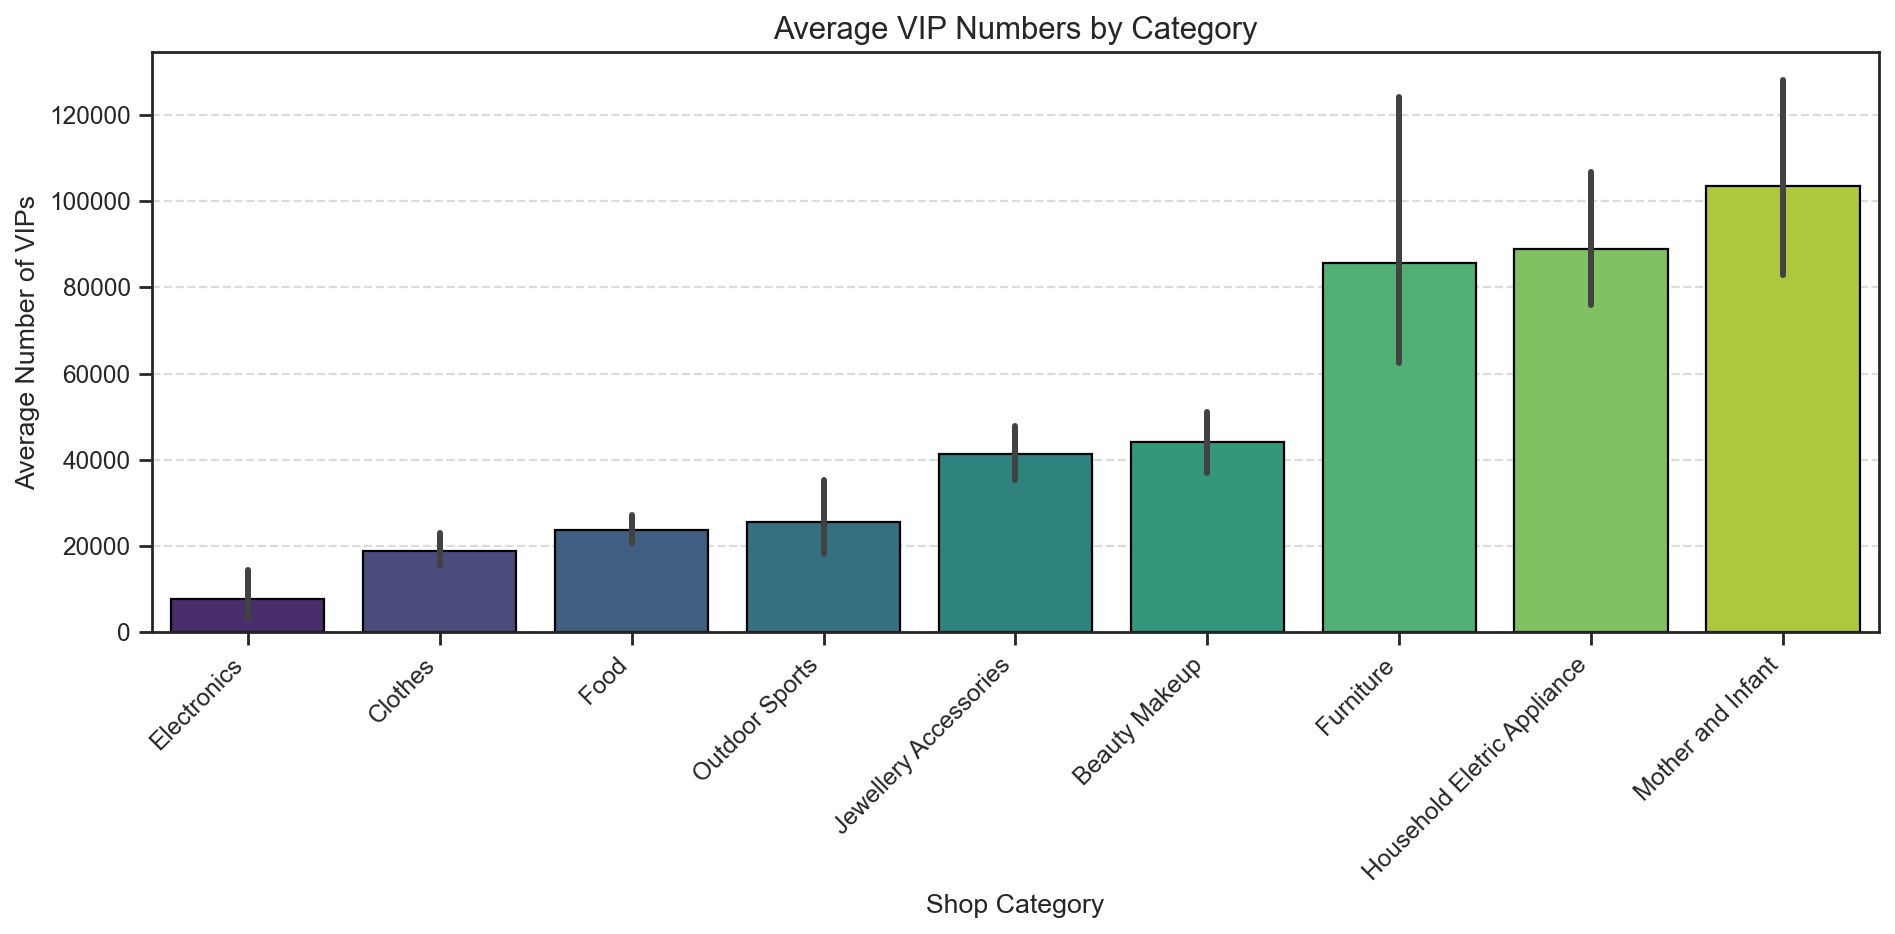

In [18]:



shop_order = shop_info.groupby('shop_category')['vip_number'].mean().sort_values().index.tolist()


plt.figure(figsize=(12, 6))


sns.barplot(
    x='shop_category',
    y='vip_number',
    data=shop_info,
    order=shop_order,
    palette='viridis',         
    edgecolor='black'
)

plt.xticks(rotation=45, ha='right')


plt.title('Average VIP Numbers by Category', fontsize=14)
plt.xlabel('Shop Category', fontsize=12)
plt.ylabel('Average Number of VIPs', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.savefig('average_shop_vips_by_category.png', dpi=300)
plt.show()



Categories like **Mother and Infant**, **Household Appliances**, and **Furniture** stand out with the highest average VIP customers, indicating strong brand loyalty and repeat buying behavior. In contrast, **Electronics** and **Clothes** have significantly fewer VIPs, suggesting more transactional or one-time buying patterns.


### Shop Score (Rating) Distribution

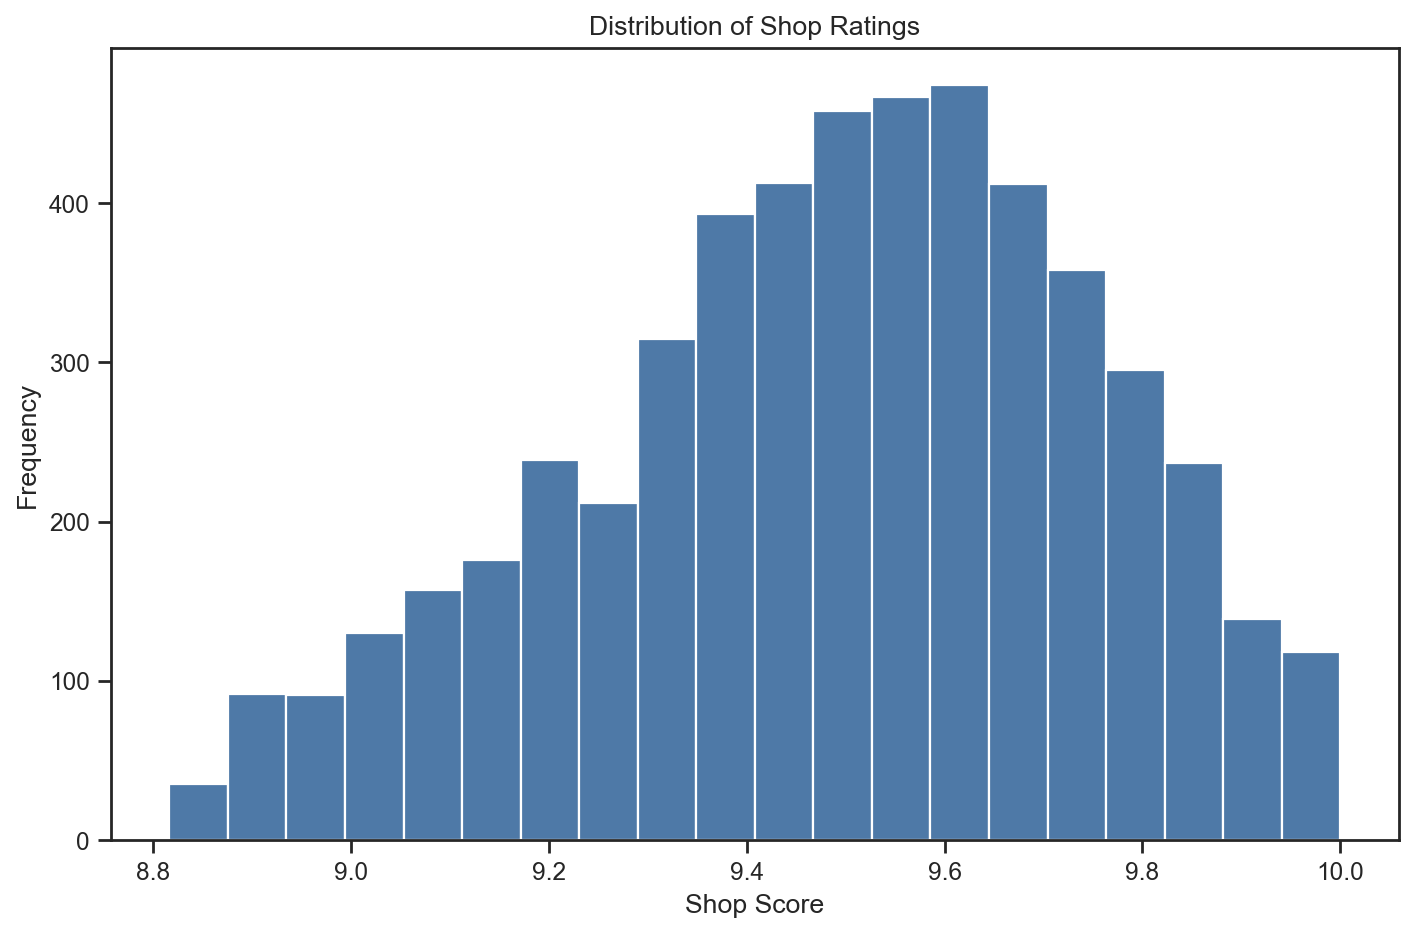

In [19]:
shop_info['shop_score'].plot(
    kind='hist',
    bins=20,
    title='Distribution of Shop Ratings',
    xlabel='Shop Score'
)
plt.tight_layout()
plt.savefig('shop_score_distribution.png', dpi=300)
plt.show()


Most shops have ratings between 9.3 and 9.7, indicating a high overall satisfaction among customers.

### Shop Registration Trend Over Time

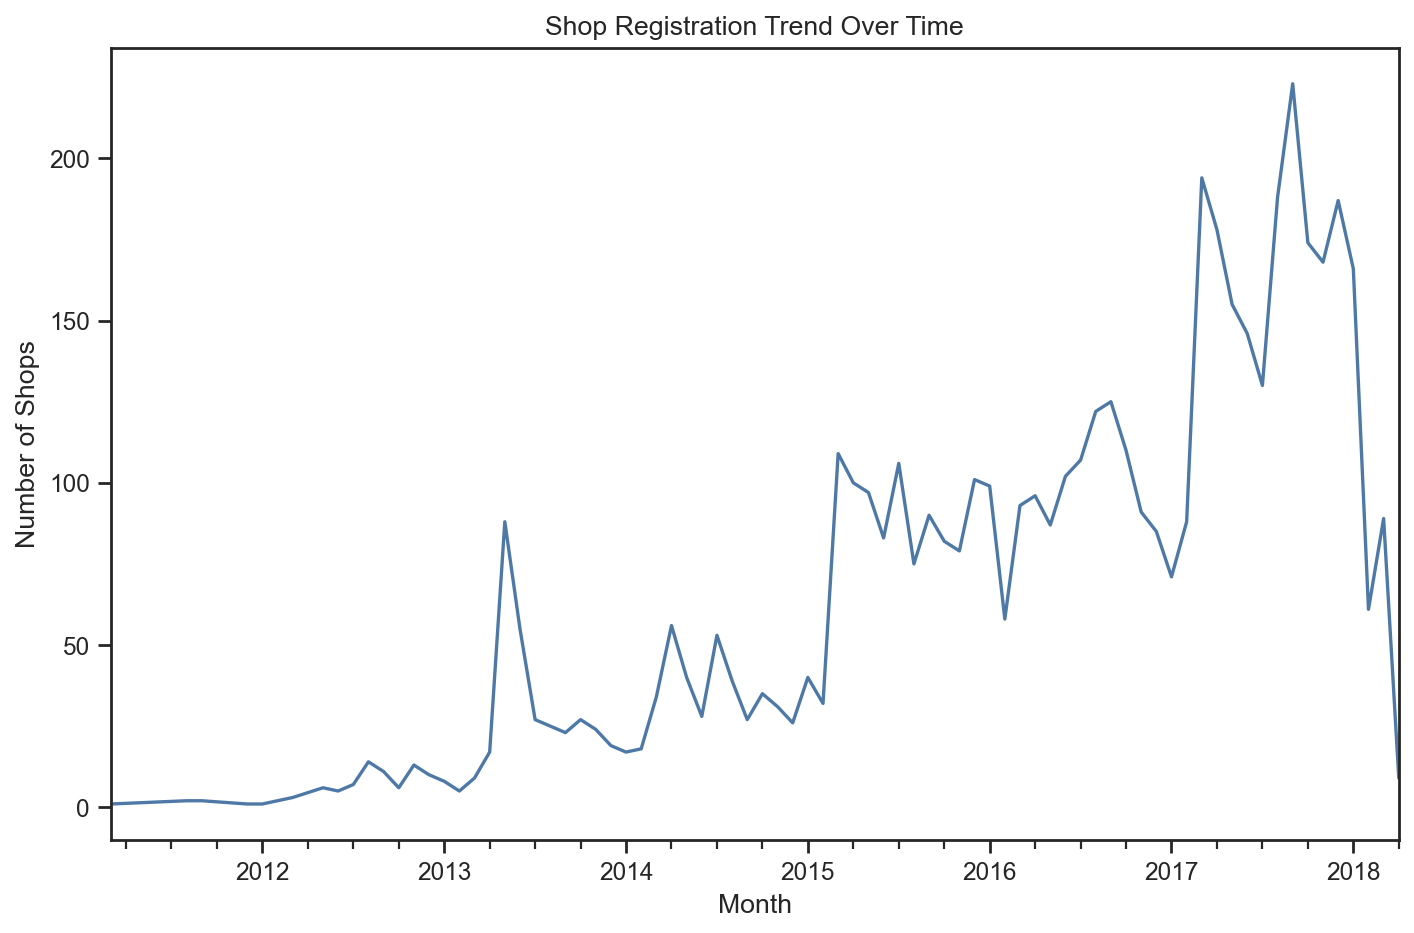

In [20]:
shop_info['shop_register_date'].dt.to_period('M').value_counts().sort_index().plot(
    title='Shop Registration Trend Over Time',
    xlabel='Month',
    ylabel='Number of Shops'
)
plt.tight_layout()
plt.savefig('shop_registration_trend.png', dpi=300)
plt.show()


Starting in 2015, there is a consistent upward trend in shop registration, peaking around 2017.

### Insights

In [21]:
summary = {
    'Total Shops': shop_info['shop_id'].nunique(),
    'Most Common Shop Category': shop_info['shop_category'].mode()[0],
    'Average Fans per Shop': round(shop_info['fans_number'].mean(), 2),
    'Average VIP per Shop': round(shop_info['vip_number'].mean(), 2),
    'Average Shop Score': round(shop_info['shop_score'].mean(), 2)
}
pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])


Value
Total Shops                    5211
Most Common Shop Category      Food
Average Fans per Shop      29626.51
Average VIP per Shop       53753.35
Average Shop Score             9.49

There are currently 5211 shops in JD.com with an average shop score of 9.49.
### Platform Growth Trend

- Shop registrations steadily increased from **2011 to 2014**, followed by a period of **rapid expansion between 2015 and 2017**.
- This growth phase likely reflects successful platform scaling, merchant acquisition efforts, or favorable external market conditions.
- In contrast, **registrations declined in 2018**, which may be attributed to platform saturation, shifting platform policies, or increased industry competition.

**Recommendation**: Review the specific strategies implemented during 2016–2017 to assess whether similar approaches can be adapted to reinvigorate platform growth in the current landscape.

---

### Shop Category Performance

- The **Food** category contains the largest number of shops, suggesting strong merchant onboarding or sustained consumer demand in this area.
- However, the **highest engagement from VIP users** is concentrated in:
  - **Mother and Infant**
  - **Household Electric Appliance**
  - **Furniture**

These categories average **over 85,000 VIPs per shop**, significantly outperforming other categories such as **Electronics** and **Clothing** in terms of value-added engagement.

**Recommendation**: Focus resources on high-VIP categories by adjusting marketing strategies, enhancing merchant support, and strengthening loyalty initiatives to improve return on investment.

---

### Shop Ratings Analysis

- Most shops have ratings between **9.2 and 9.8**, with a peak around **9.5 to 9.6**.
- The narrow range indicates consistent merchant performance, potentially driven by effective quality control mechanisms or platform-level policies.

**Recommendation**: Maintain high-quality performance by continuing to enforce seller standards and invest in customer experience policies that support trust and reliability.

---

### User Engagement Patterns

- On average, each shop has:
  - Approximately **29,600 fans**
  - Approximately **53,800 VIPs**

The higher number of VIPs suggests that users are actively participating in loyalty programs or membership offerings.

**Recommendation**: Conduct further analysis of VIP behavior to inform targeted retention strategies, personalized experiences, and high-LTV (lifetime value) user management programs.

---

## Overall Summary

The platform shows signs of maturity, backed by strong engagement, merchant quality, and user loyalty. While the **Food** category dominates by volume, true strategic value lies in nurturing **VIP-heavy categories** such as **Mother and Infant** and **Home Appliances**. 

**Recommendation**: Adopt a category-driven approach supported by loyalty analysis and revisit historical growth strategies to unlock new performance potential.


## 3.3 Product information

In [22]:
product_all=df[df['type'].isin(['PageView','Order'])]
product_pv=df[df['type']=='PageView']
product_order=df[df['type']=='Order']

product_all=product_all[product_info]
product_pv=product_pv[product_info]
product_order=product_order[product_info]
product_all

product_id    brand            category product_market_date  vender_id
0           328360  LukFook            Bracelet          2017-10-05       4322
1           141632   illuma          Milk Power          2015-06-12       3563
2             5924  Li-Ning           Badminton          2013-06-14       1457
3            10723  Li-Ning           Badminton          2011-07-19       1457
4             4559    Other              Cookie          2015-11-16        355
...            ...      ...                 ...                 ...        ...
183823      336363    Proya  Foundation Make-up          2017-02-15       6405
183824      159431  Playboy                Coat          2017-11-07       1018
183825      199816   Huawei               Phone          2017-08-11       3666
183826      286812    Other               Phone          2013-03-19       3666
183827      372173    Apple               Phone          2017-09-20       3666

[174652 rows x 5 columns]

### Top 10 Most Viewed Product Brands

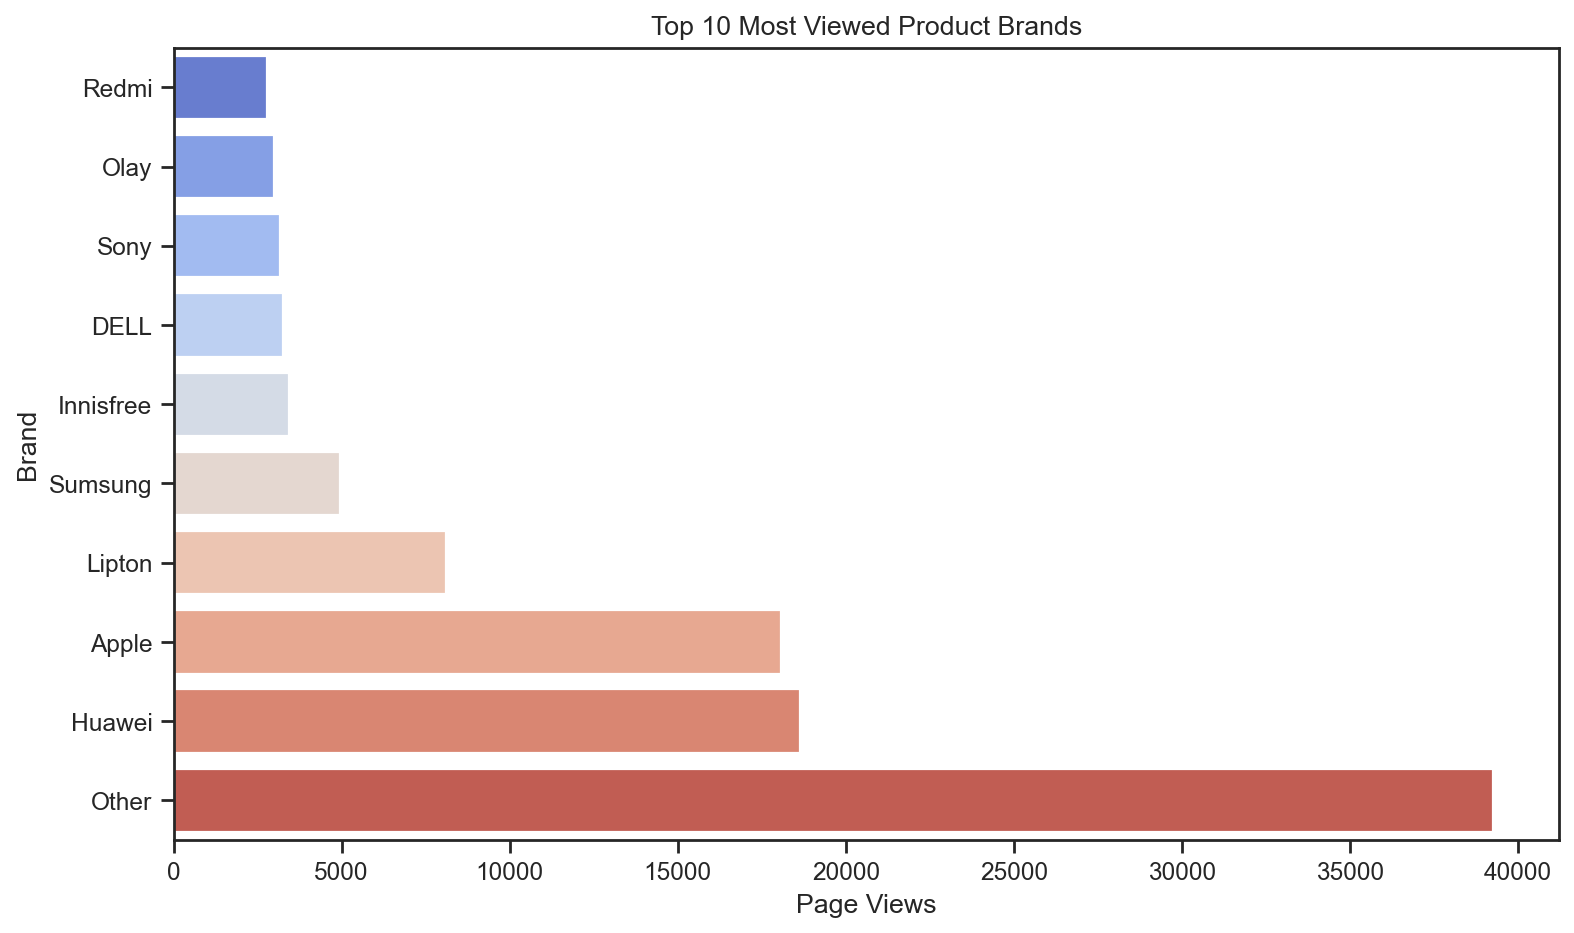

In [23]:
# Count top 10 brands by page views
top_brands = (
    product_pv['brand']
    .value_counts()
    .head(10)
    .sort_values(ascending=True)
)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='coolwarm')
plt.title('Top 10 Most Viewed Product Brands')
plt.xlabel('Page Views')
plt.ylabel('Brand')
plt.tight_layout()
plt.savefig('top_10_most_viewed_brands.png')  
plt.show()


The most viewed brands are unknown brands, followed by Huawei and Apple.

### Top 10 Most Viewed Product Categories 

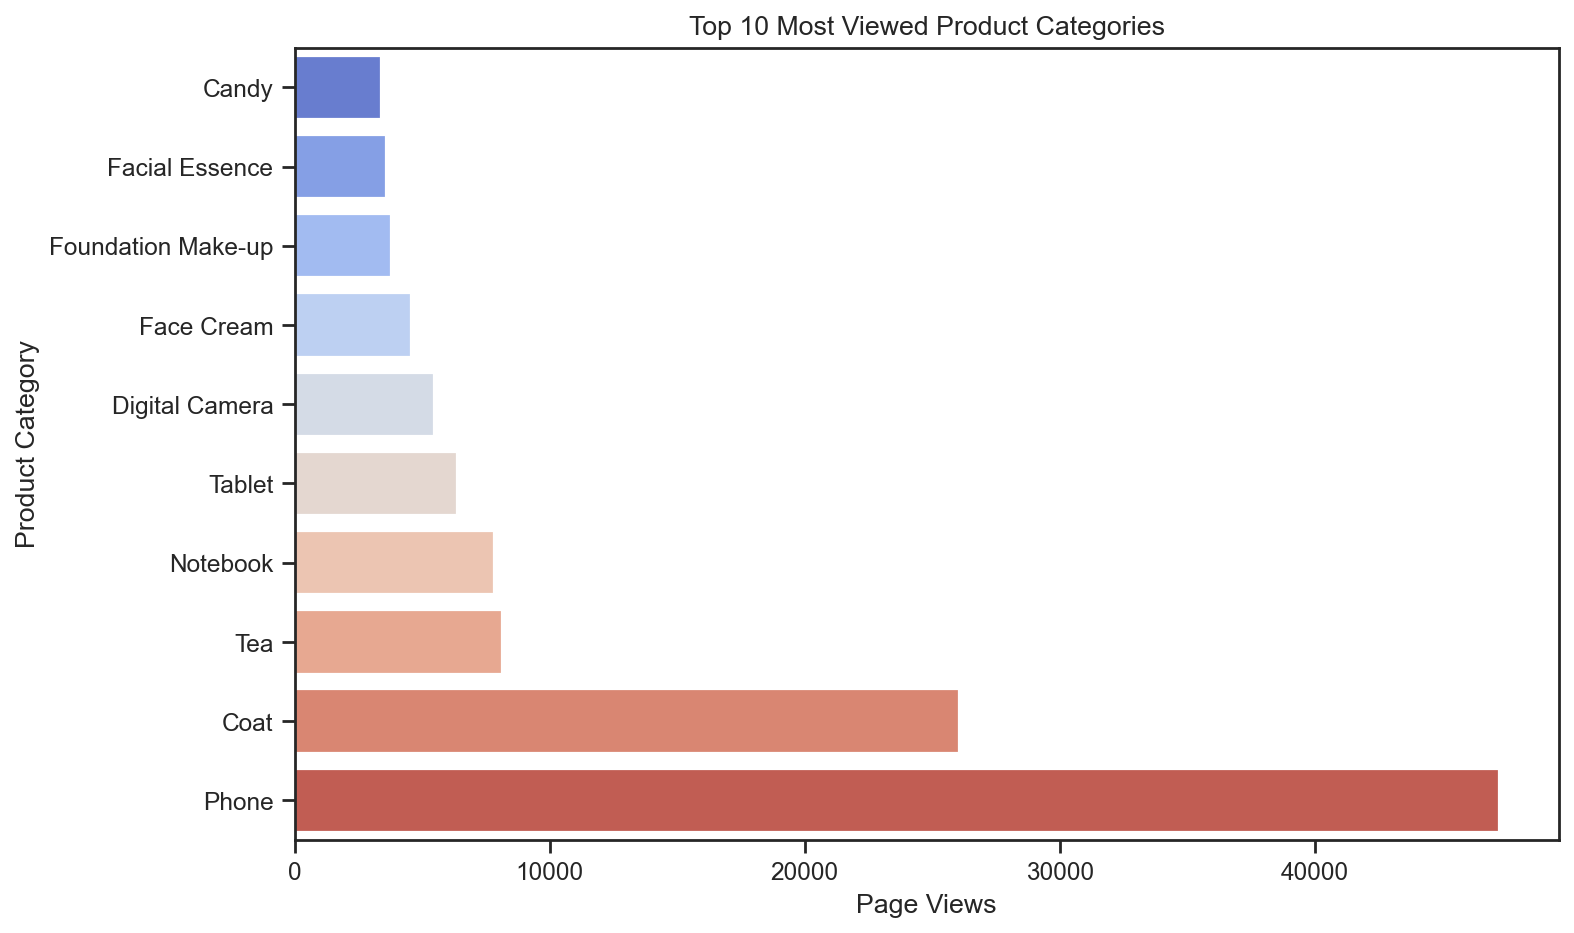

In [24]:

# Count top 10 categories by page views
top_categories = (
    product_pv['category']
    .value_counts()
    .head(10)
    .sort_values(ascending=True)
)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='coolwarm')
plt.title('Top 10 Most Viewed Product Categories')
plt.xlabel('Page Views')
plt.ylabel('Product Category')
plt.tight_layout()
plt.savefig('top_10_most_viewed_categories.png')  
plt.show()


The most viewed products are cell phones and jackets.

### Top 10 Categories by Orders

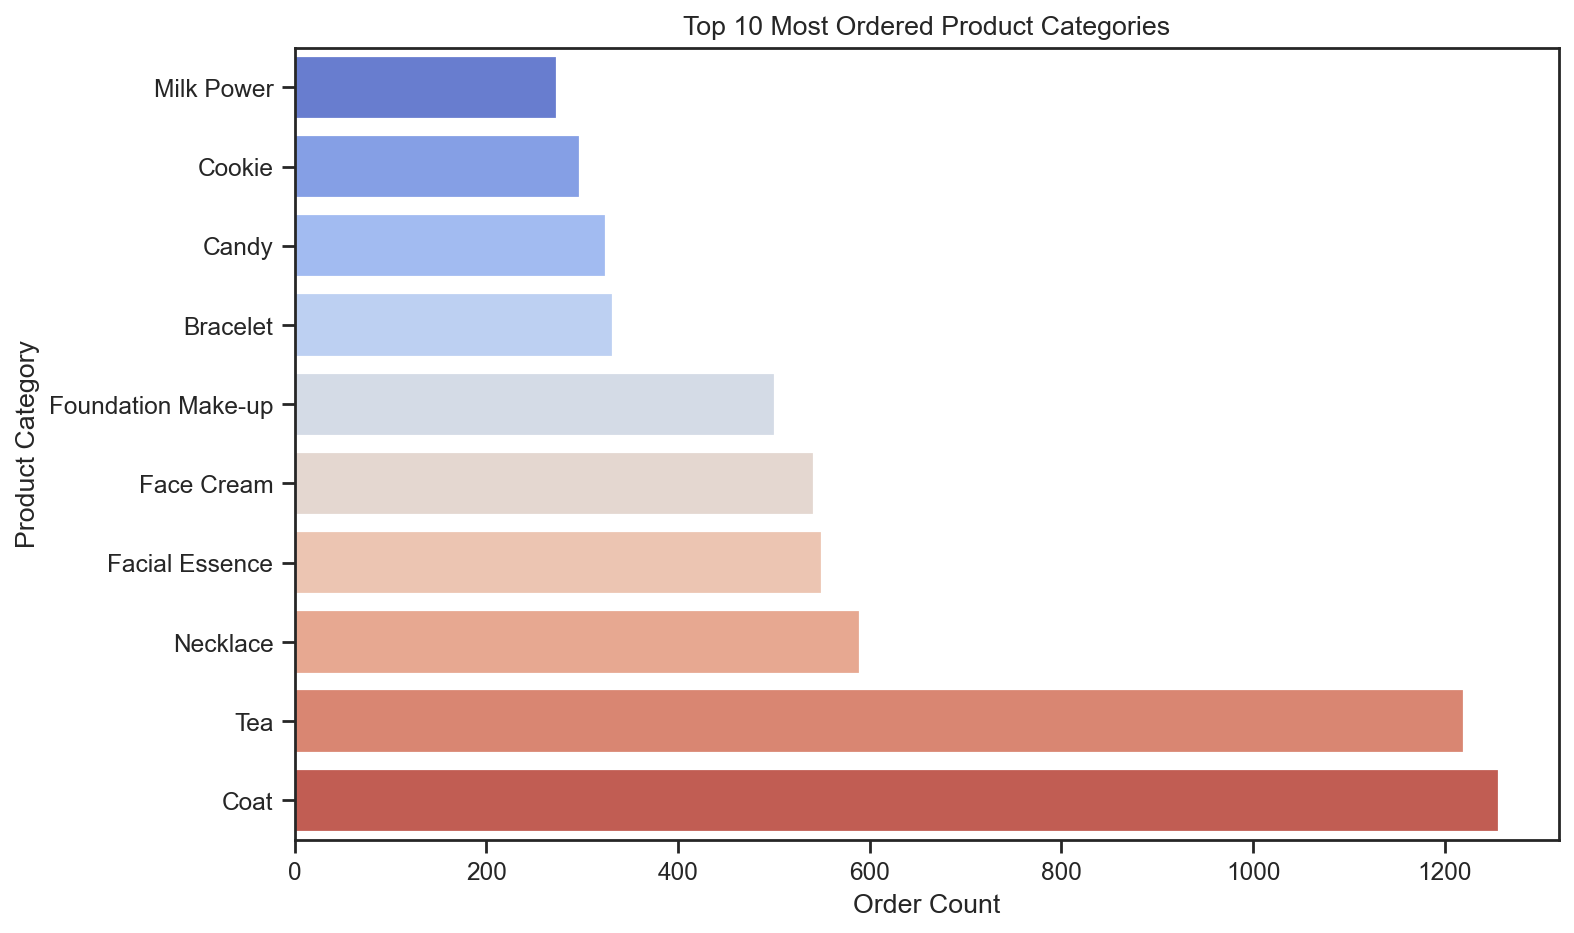

In [25]:


top_ordered_categories = (
    product_order['category']
    .value_counts()
    .head(10)
    .sort_values(ascending=True)
)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_ordered_categories.values, y=top_ordered_categories.index, palette='coolwarm')
plt.title('Top 10 Most Ordered Product Categories')
plt.xlabel('Order Count')
plt.ylabel('Product Category')
plt.tight_layout()
plt.savefig('top_10_most_ordered_categories.png')  
plt.show()


The most purchased products are coats and teas, which makes sense given the season changes.

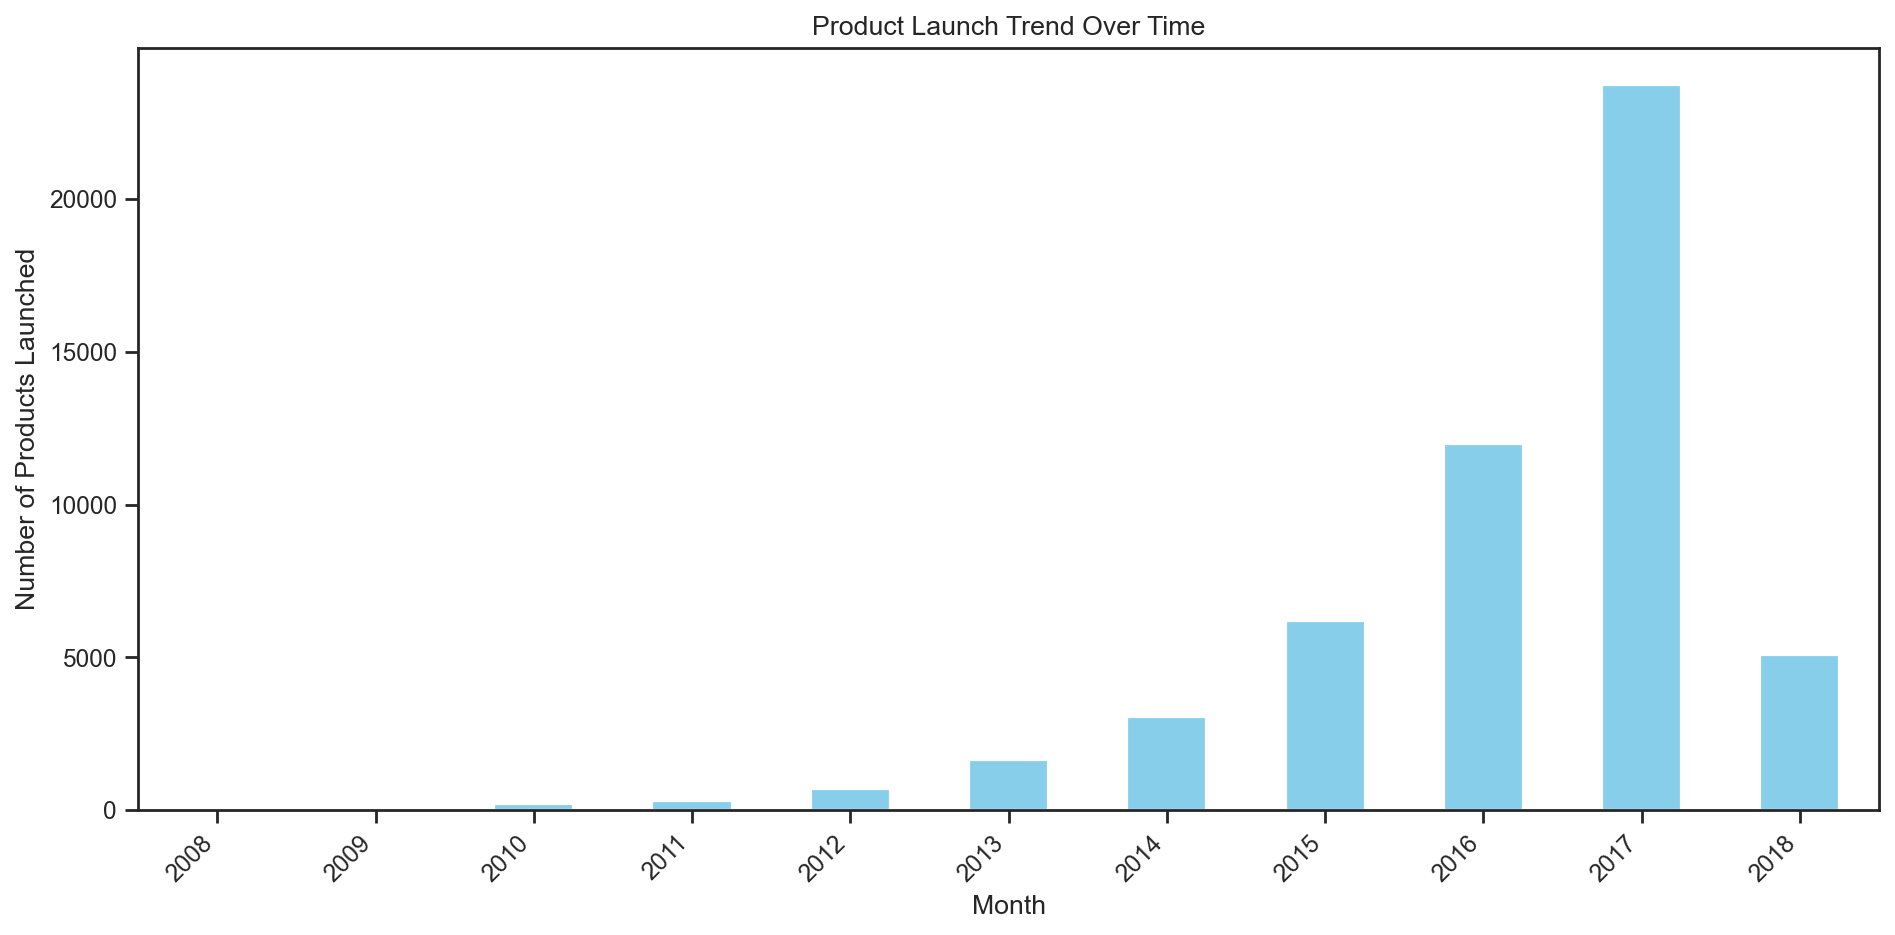

In [26]:
product_unique = df[product_info].drop_duplicates(subset='product_id')


product_unique['product_market_date'] = pd.to_datetime(product_unique['product_market_date'])



# Group by launch month
launch_trend = (
    product_unique['product_market_date']
    .dt.to_period('Y')
    .value_counts()
    .sort_index()
)


launch_trend.plot(
    kind='bar',
    title='Product Launch Trend Over Time',
    xlabel='Month',
    ylabel='Number of Products Launched',
    figsize=(12, 6),
    color='skyblue'
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('product_launch_trend_bar.png', dpi=300)
plt.show()


The majority of **purchased products were launched between 2015 and 2017**, suggesting that users tend to buy items released in the recent 1–3 years.

# Product Insights and Recommendations

## Product Launch Trend

- Product launches increased steadily from 2010 to 2015.
- A significant surge occurred in 2016 and peaked in 2017, followed by a decline in 2018.

**Recommendation**: Investigate and replicate the successful strategies used during 2016–2017 to reinvigorate new product development and maintain launch momentum.

---

## Most Viewed Product Brands

- The highest page views are attributed to unknown brands ("Other").
- Huawei and Apple are the top-known brands with the most views.
- Brands like Sony, Redmi, and DELL have relatively low visibility.

**Recommendation**: Enhance brand presence through improved SEO, targeted ads, and homepage exposure to promote known and strategic partner brands.

---

## Most Viewed Product Categories

- Phones and Coats are the most viewed categories, indicating strong browsing interest.
- Categories such as Tea, Notebooks, and Digital Cameras have moderate engagement.

**Recommendation**: Focus on converting high-traffic categories through targeted promotions, retargeting strategies, and product bundling based on user interest.

---

## Most Ordered Product Categories

- Tea and Coats have the highest number of orders.
- Other frequently ordered items include Necklaces, Facial Essence, and Face Cream.
- Categories like Milk Powder, Cookies, and Candy show lower sales volumes.

**Recommendation**: Increase the visibility of high-performing categories through homepage placement. For low-performing categories, offer limited-time discounts or bundles to boost sales.

---

## Conversion Funnel Analysis

- There is a significant drop-off in the user journey:
  - 105,072 page views
  - 8,447 orders
  - 3,068 comments

**Recommendation**:
1. Collect and analyze consumer profiles, including demographic, geographic, psychographic, and behavioral data.
2. Use segmentation to design targeted marketing strategies.
3. Improve product page design and user experience to reduce friction.
4. Offer incentives for leaving reviews and repeat purchases to enhance engagement.



## 3.4 User behaviors information

In [27]:

behavior_columns = ['customer_id', 'action_id', 'action_date', 'type']


behavior_data = df[behavior_columns]


behavior_data


customer_id  action_id         action_date      type
0            976695   10633744 2018-03-05 08:52:00  PageView
1            395399    5472028 2018-03-20 10:55:00  PageView
2           1068082    3853455 2018-04-01 13:56:00  PageView
3           1068082    3853455 2018-04-01 13:45:00  PageView
4            735392    9434940 2018-02-06 20:25:00  PageView
...             ...        ...                 ...       ...
183823      1548316     240062 2018-03-06 03:47:00  PageView
183824      1377001   10747232 2018-03-14 21:16:00  PageView
183825      1377001   10747232 2018-03-14 21:17:00  PageView
183826      1057196    5702636 2018-04-07 11:54:00  PageView
183827        67145     164637 2018-03-25 06:21:00  PageView

[183828 rows x 4 columns]

In [28]:
behavior_data['type'].value_counts()

type
PageView     163954
Order         10698
Comment        4010
SavedCart      2987
Follow         2179
Name: count, dtype: int64

There are **5 types of user behaviors** recorded in the dataset:

- `PageView`: Viewing a product detail page  
- `Order`: Placing an order (purchase)  
- `Comment`: Leaving a product review  
- `Follow`: Following a shop  
- `SavedCart`: Adding a product to the shopping cart 

In [29]:
behavior_data['action_date'].describe()

count                           183828
mean     2018-03-08 03:19:10.532345344
min                2018-02-01 00:00:00
25%                2018-02-15 23:00:00
50%                2018-03-07 21:22:30
75%                2018-03-25 19:28:00
max                2018-04-15 23:59:00
Name: action_date, dtype: object

The dataset contains **consumer action records** from **February 1st, 2018 to April 15th, 2018**.

In [30]:

behavior_data.rename(columns={'action_date': 'action_time'}, inplace=True)

# Extract hour from timestamp
behavior_data['action_hour'] = behavior_data['action_time'].dt.strftime('%H').astype(int)


# Extract just the date
behavior_data['action_date'] = behavior_data['action_time'].dt.date

# Extract weekday name (e.g., Monday, Tuesday, etc.)
behavior_data['action_weekday'] = behavior_data['action_time'].dt.day_name()

behavior_data

customer_id  action_id         action_time      type  action_hour  \
0            976695   10633744 2018-03-05 08:52:00  PageView            8   
1            395399    5472028 2018-03-20 10:55:00  PageView           10   
2           1068082    3853455 2018-04-01 13:56:00  PageView           13   
3           1068082    3853455 2018-04-01 13:45:00  PageView           13   
4            735392    9434940 2018-02-06 20:25:00  PageView           20   
...             ...        ...                 ...       ...          ...   
183823      1548316     240062 2018-03-06 03:47:00  PageView            3   
183824      1377001   10747232 2018-03-14 21:16:00  PageView           21   
183825      1377001   10747232 2018-03-14 21:17:00  PageView           21   
183826      1057196    5702636 2018-04-07 11:54:00  PageView           11   
183827        67145     164637 2018-03-25 06:21:00  PageView            6   

       action_date action_weekday  
0       2018-03-05         Monday  
1       2018-03-20        Tuesday  
2       2018-04-01         Sunday  
3       2018-04-01         Sunday  
4       2018-02-06        Tuesday  
...            ...            ...  
183823  2018-03-06        Tuesday  
183824  2018-03-14      Wednesday  
183825  2018-03-14      Wednesday  
183826  2018-04-07       Saturday  
183827  2018-03-25         Sunday  

[183828 rows x 7 columns]

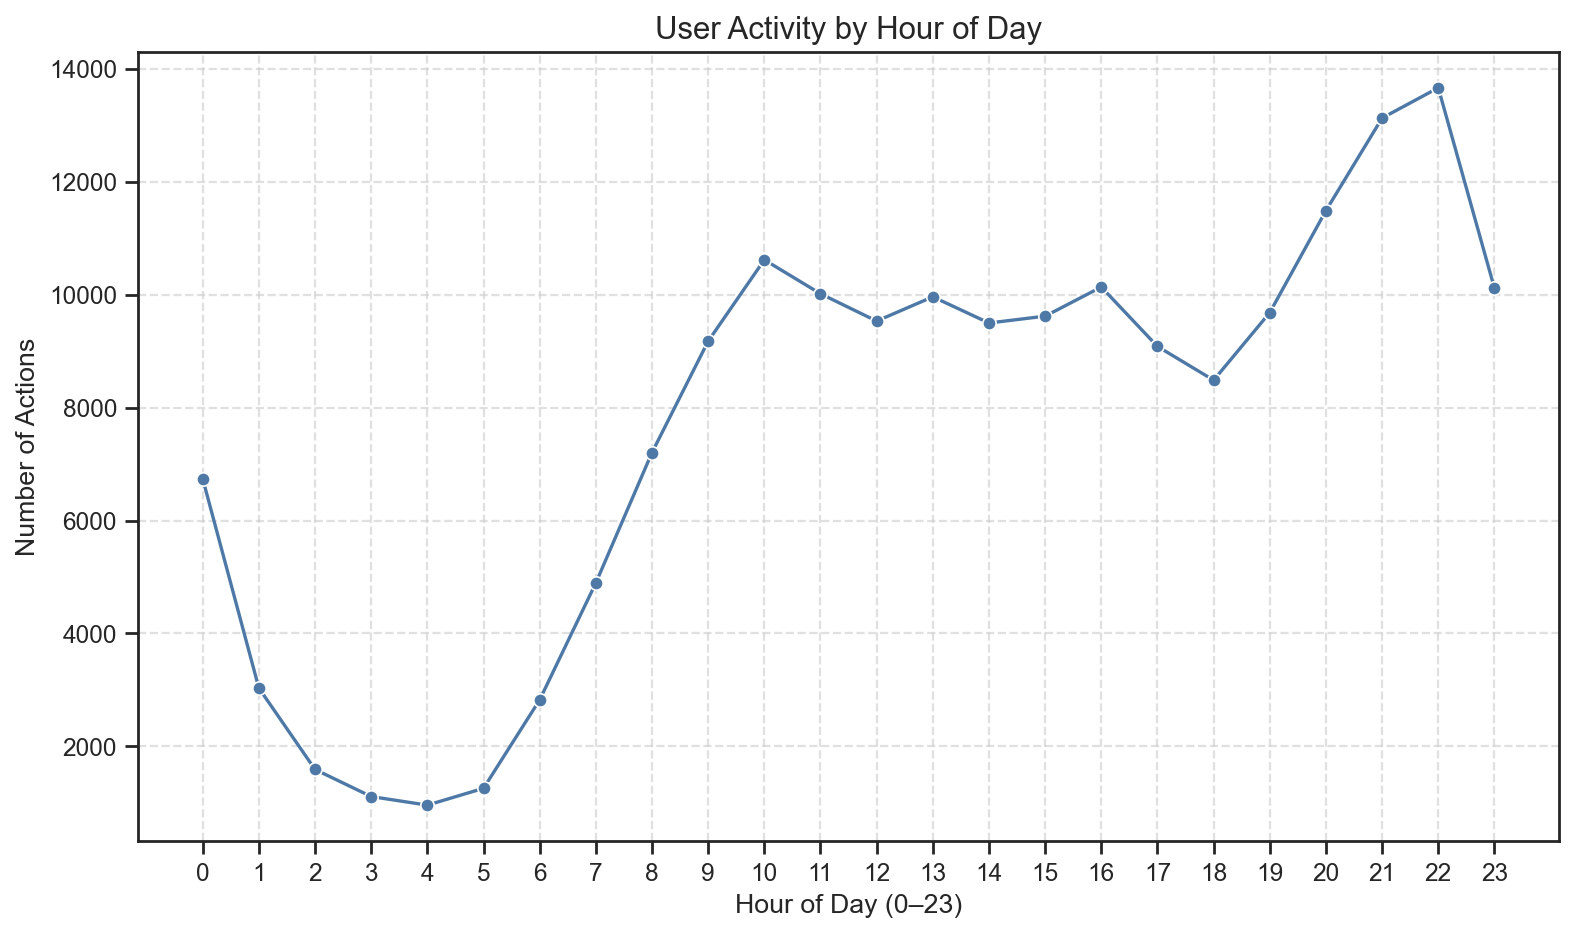

In [31]:
hourly_activity=behavior_data[['action_hour','customer_id']].drop_duplicates()

# Group by hour to count number of actions
hourly_activity = behavior_data.groupby('action_hour').size().reset_index(name='count')

# Sort by hour
hourly_activity = hourly_activity.sort_values(by='action_hour')


plt.figure(figsize=(10, 6))
sns.lineplot(x='action_hour', y='count', data=hourly_activity, marker='o')


plt.title("User Activity by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day (0–23)", fontsize=12)
plt.ylabel("Number of Actions", fontsize=12)
plt.xticks(range(0, 24))  # Ensure all 24 hours are labeled
plt.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.savefig('user_activity_by_hour.png', dpi=300)
plt.show()


The number of people using the E-commerce platform gradually increases from 5pm and peaks at 10pm, indicating that users are most active during evening hours—likely due to increased availability and leisure time after work or school.

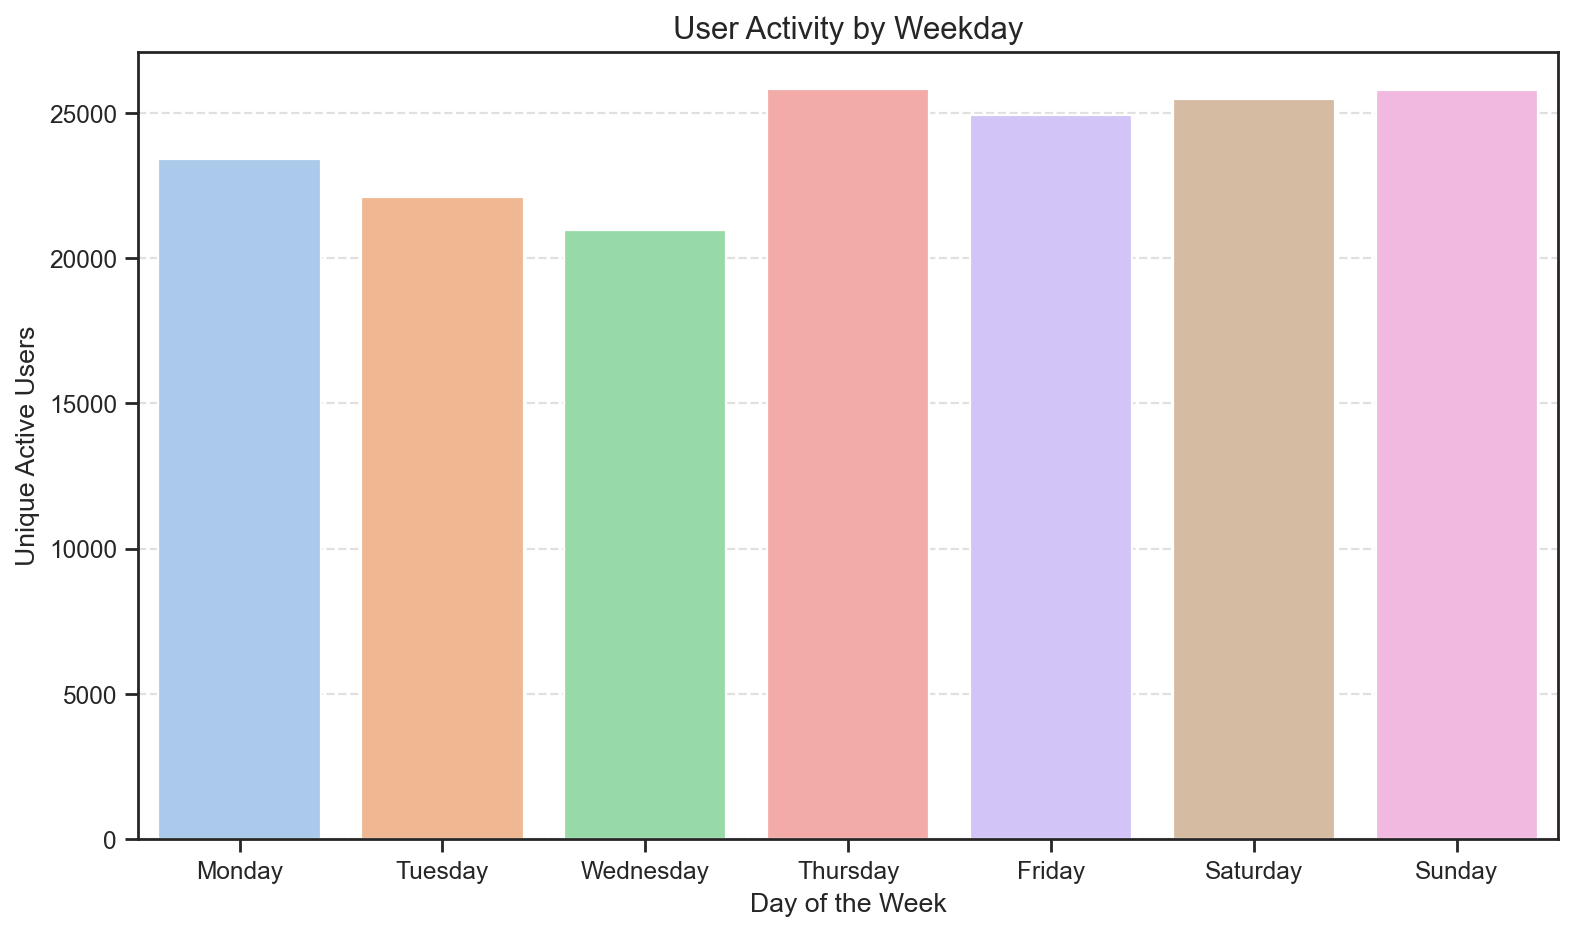

In [32]:
weekday_activity = behavior_data[['action_weekday', 'customer_id']].drop_duplicates()

# Count number of unique users per weekday
weekday_counts = weekday_activity.groupby('action_weekday').size().reset_index(name='count')

# Ensure proper weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts['action_weekday'] = pd.Categorical(weekday_counts['action_weekday'], categories=weekday_order, ordered=True)
weekday_counts = weekday_counts.sort_values('action_weekday')


plt.figure(figsize=(10, 6))
sns.barplot(x='action_weekday', y='count', data=weekday_counts, palette='pastel')


plt.title('User Activity by Weekday', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Unique Active Users', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.tight_layout()
plt.savefig('user_activity_by_weekday.png', dpi=300)
plt.show()
                                               

Platform activity is higher from Thursday to Sunday, suggesting that users tend to browse and shop more during the latter part of the week. This aligns with typical behavior patterns, as people may have more free time and flexibility after midweek, especially leading into the weekend.

## User Behavior Patterns

### Hourly Activity Trend

- User activity begins increasing around **6 AM**, peaks between **10 AM and 11 AM**, and then again around **9 PM to 10 PM**.
- The **lowest engagement occurs between 2 AM and 5 AM**, suggesting minimal overnight activity.
- The evening peak suggests users are more likely to interact with the platform after work hours.

**Recommendation**:  
Schedule promotions and personalized push notifications between **9–11 AM** and **8–10 PM** to align with peak activity periods.

---

### Weekly Activity Trend

- **Thursday to Sunday** consistently show the highest number of unique active users.
- **Wednesday** sees the **lowest activity**, with a gradual increase as the weekend approaches.

**Recommendation**:  
Launch major campaigns, product releases, or flash sales from **Thursday through Sunday** to capitalize on higher engagement.  
Consider running retention campaigns mid-week to smooth out the dip on Wednesdays.


# 4. E-Commerce KPI analysis

### Data Scope and Selection

The dataset covers user behavior from **February 18 to April 15, 2018**. However, for the purpose of consistent and meaningful monthly comparison, only data from **February and March** is used in the analysis.  
April is excluded as it represents an **incomplete month**, which could bias monthly trend comparisons.


In [33]:

df.rename(columns={'action_date': 'action_time'}, inplace=True)

df['action_hour'] = df['action_time'].dt.strftime('%H').astype(int)
df['action_month'] = df['action_time'].dt.strftime('%Y-%m')
df['action_day']=df['action_time'].dt.strftime('%d')
df['action_date'] = df['action_time'].dt.strftime('%Y-%m-%d')
df=df[df['action_month']!='2018-04']

In [34]:
df

customer_id  product_id         action_time  action_id      type  \
0            976695      328360 2018-03-05 08:52:00   10633744  PageView   
1            395399      141632 2018-03-20 10:55:00    5472028  PageView   
4            735392        4559 2018-02-06 20:25:00    9434940  PageView   
5           1093882      339554 2018-02-04 01:36:00    7774014  PageView   
6           1516193      374293 2018-03-17 03:18:00    2105553  PageView   
...             ...         ...                 ...        ...       ...   
183822       926824      353584 2018-03-17 21:55:00    3019875  PageView   
183823      1548316      336363 2018-03-06 03:47:00     240062  PageView   
183824      1377001      159431 2018-03-14 21:16:00   10747232  PageView   
183825      1377001      199816 2018-03-14 21:17:00   10747232  PageView   
183827        67145      372173 2018-03-25 06:21:00     164637  PageView   

        age_range gender customer_register_date  customer_level  city_level  \
0             5.0      W             2017-06-17               6         3.0   
1             4.0      M             2018-01-21               6         5.0   
4             6.0      M             2009-09-15               7         5.0   
5             5.0      M             2014-05-28               7         4.0   
6             6.0      M             2016-05-25               1         4.0   
...           ...    ...                    ...             ...         ...   
183822        5.0      W             2014-05-19               5         4.0   
183823        5.0      M             2016-12-24               1         1.0   
183824        6.0      M             2015-05-23               7         4.0   
183825        6.0      M             2015-05-23               7         4.0   
183827        2.0      W             2012-11-06               7         3.0   

        ... vender_id  fans_number vip_number shop_register_date  \
0       ...      4322         1159      36596         2017-07-04   
1       ...      3563         2411      65893         2013-08-08   
4       ...       355        63969      85597         2014-10-31   
5       ...      3666            0          0                NaT   
6       ...        25        11576      20927         2016-12-16   
...     ...       ...          ...        ...                ...   
183822  ...      3666            0          0                NaT   
183823  ...      6405       152180     245328         2016-08-04   
183824  ...      1018       104791     123240         2015-05-08   
183825  ...      3666            0          0                NaT   
183827  ...      3666            0          0                NaT   

                shop_category  shop_score  action_hour action_month  \
0       Jewellery Accessories    9.043610            8      2018-03   
1           Mother and Infant    9.537151           10      2018-03   
4                        Food    9.665680           20      2018-02   
5                 Electronics    0.000000            1      2018-02   
6           Mother and Infant    9.643767            3      2018-03   
...                       ...         ...          ...          ...   
183822            Electronics    0.000000           21      2018-03   
183823          Beauty Makeup    9.545597            3      2018-03   
183824                Clothes    9.531975           21      2018-03   
183825            Electronics    0.000000           21      2018-03   
183827            Electronics    0.000000            6      2018-03   

       action_day  action_date  
0              05   2018-03-05  
1              20   2018-03-20  
4              06   2018-02-06  
5              04   2018-02-04  
6              17   2018-03-17  
...           ...          ...  
183822         17   2018-03-17  
183823         06   2018-03-06  
183824         14   2018-03-14  
183825         14   2018-03-14  
183827         25   2018-03-25  

[148606 rows x 24 columns]

## 4.1 Daily Web Traffic Analysis: DAU (Daily Active User) and Daily Orders

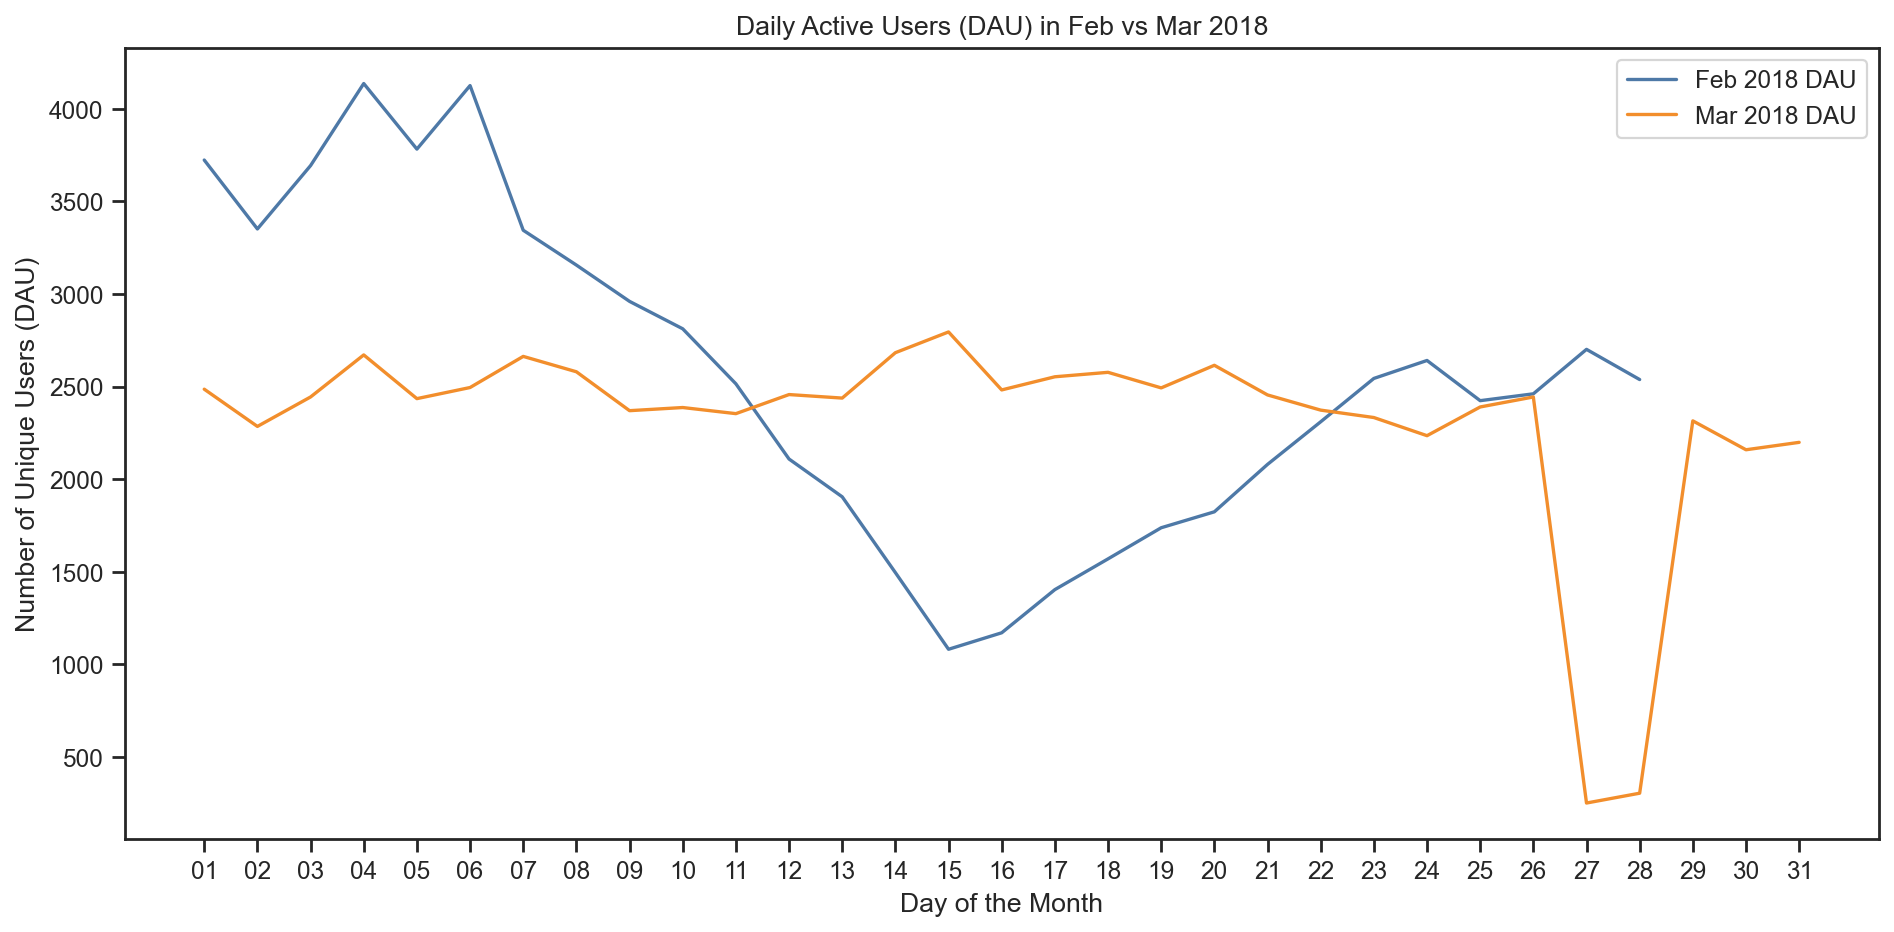

In [35]:
# Extract DAU
day_active = df[['customer_id', 'action_day', 'action_month', 'type']].drop_duplicates()

# Filter for each month
month2 = day_active[day_active['action_month'] == '2018-02']
month3 = day_active[day_active['action_month'] == '2018-03']

# Count DAU per day and sort by action_day
day2 = month2['action_day'].value_counts().reset_index()
day2.columns = ['action_day', 'Feb_DAU']
day2 = day2.sort_values(by='action_day')

day3 = month3['action_day'].value_counts().reset_index()
day3.columns = ['action_day', 'Mar_DAU']
day3 = day3.sort_values(by='action_day')

# Merge
dau_combined = pd.merge(day2, day3, on='action_day', how='outer').sort_values(by='action_day')


plt.figure(figsize=(12, 6))
sns.lineplot(data=dau_combined, x='action_day', y='Feb_DAU', label='Feb 2018 DAU')
sns.lineplot(data=dau_combined, x='action_day', y='Mar_DAU', label='Mar 2018 DAU')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Unique Users (DAU)')
plt.title('Daily Active Users (DAU) in Feb vs Mar 2018')
plt.legend()
plt.tight_layout()
plt.savefig('DAU_Comparison_Feb_Mar_2018.png', dpi=300)
plt.show()


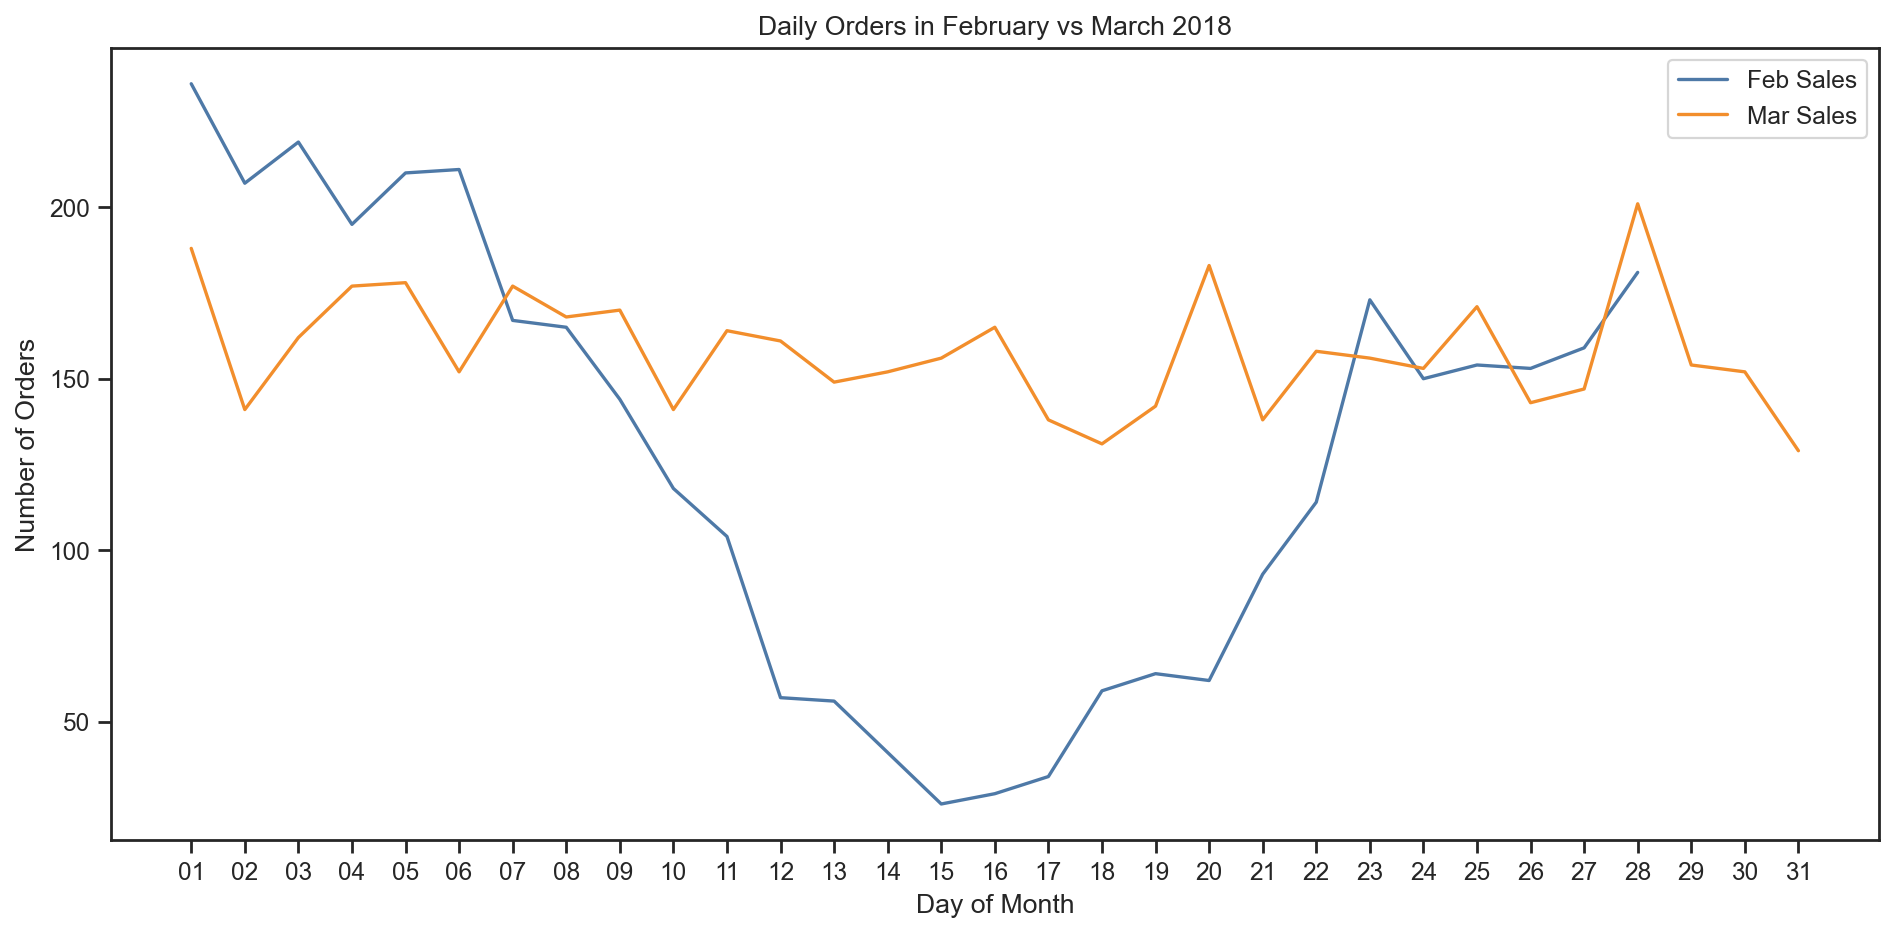

In [36]:
order_data = df[df['type'] == 'Order']
order_feb = order_data[order_data['action_month'] == '2018-02']
order_mar = order_data[order_data['action_month'] == '2018-03']

# Count daily orders for February
daily_orders_feb = (
    order_feb['action_day']
    .value_counts()
    .reset_index(name='Feb_Sales')
    .rename(columns={'index': 'action_day'})  
    .sort_values(by='action_day')
)

# Count daily orders for March
daily_orders_mar = (
    order_mar['action_day']
    .value_counts()
    .reset_index(name='Mar_Sales')
    .rename(columns={'index': 'action_day'})
    .sort_values(by='action_day')
)


sales_merged = pd.merge(daily_orders_feb, daily_orders_mar, on='action_day', how='outer').sort_values(by='action_day')



plt.figure(figsize=(12, 6))
sns.lineplot(x='action_day', y='Feb_Sales', data=sales_merged, label='Feb Sales')
sns.lineplot(x='action_day', y='Mar_Sales', data=sales_merged, label='Mar Sales')
plt.title('Daily Orders in February vs March 2018')
plt.xlabel('Day of Month')
plt.ylabel('Number of Orders')
plt.legend()
plt.tight_layout()
plt.savefig('Daily_Sales_Comparison.png', dpi=300)
plt.show()



- The first line graph compares the Daily Active Users (DAU) trends for February and March.

- The second chart below displays daily order volumes, highlighting day-to-day sales activity across the same period.

### February Trends
- DAU gradually declined from February 6 to February 15, before rebounding and stabilizing around February 22 with slight day-to-day fluctuations.

- A peak in daily orders occurred during February 1–7, followed by a noticeable drop until mid-month, mirroring the DAU trend.

- Assumption:
Chinese New Year in 2018 fell on February 16, with official public holidays from February 15 to February 21.
It is common for users to make purchases in the 10 days leading up to the holiday, preparing gifts and essentials in advance. During the festival itself, many physical and online shops pause operations, and delivery services slow down—contributing to the sharp drop in both DAU and sales. Activity began to recover only after the festival.

### March Trends
- March shows relatively stable DAU and sales compared to February, except for a sharp drop in DAU on March 27, which also impacted March 28.

- Interestingly, sales volumes remained stable on those two days, not showing a corresponding dip.

Note:
This discrepancy between DAU and orders suggests that either:

- Fewer but more engaged users transacted on those days, or

- There may have been a data collection or platform logging issue that affected DAU counts but not order logs.

Further investigation is recommended to confirm the cause of this irregularity.

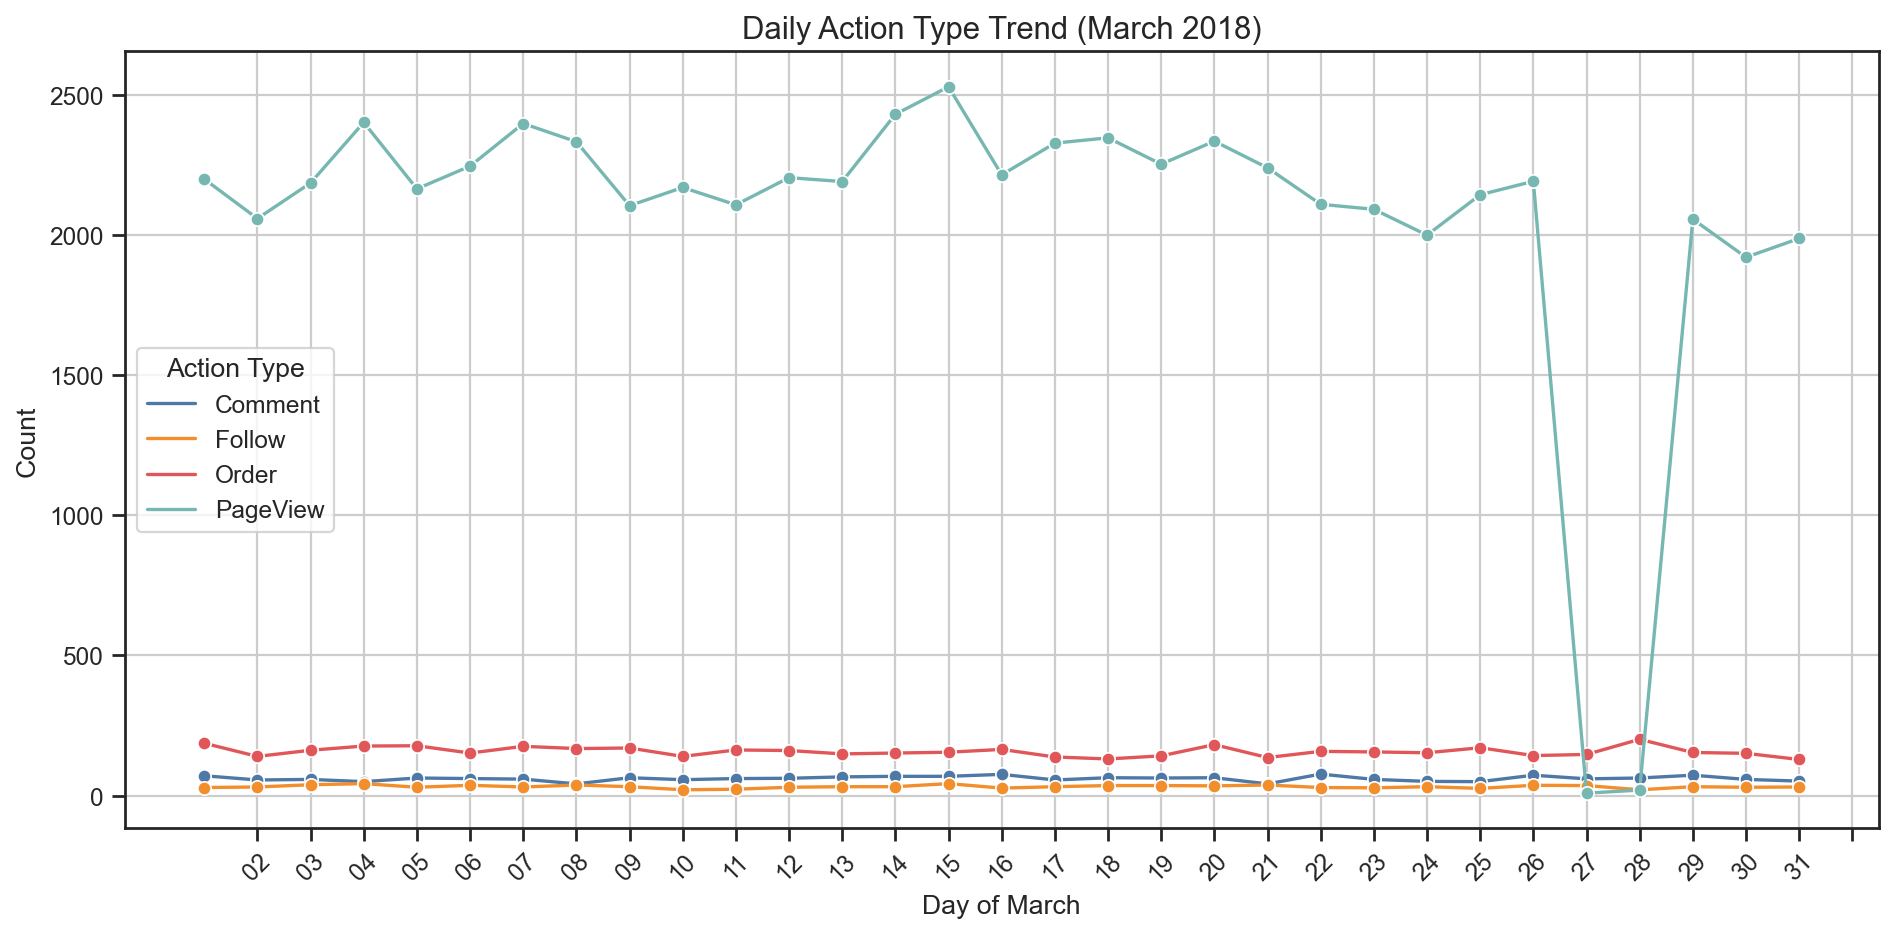

In [37]:


type_3m = month3.groupby(['action_day', 'type']).size().reset_index(name='count')


plt.figure(figsize=(12, 6))
sns.lineplot(x='action_day', y='count', hue='type', data=type_3m, marker='o')


plt.title('Daily Action Type Trend (March 2018)', fontsize=14)
plt.xlabel('Day of March', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(1, 32), rotation=45)
plt.legend(title='Action Type')
plt.grid(True)
plt.tight_layout()

plt.savefig('March_Action_Trend.png', dpi=300)
plt.show()

It can be seen that, except that the number of users page views plummeted, other types of user behaviour remain normal on the 27th and 28th. Therefore, it is reasonable to believe that there are some problems with data collection on the day, resulting in the drop of DAU.

## 4.2 Monthly Trend Analysis

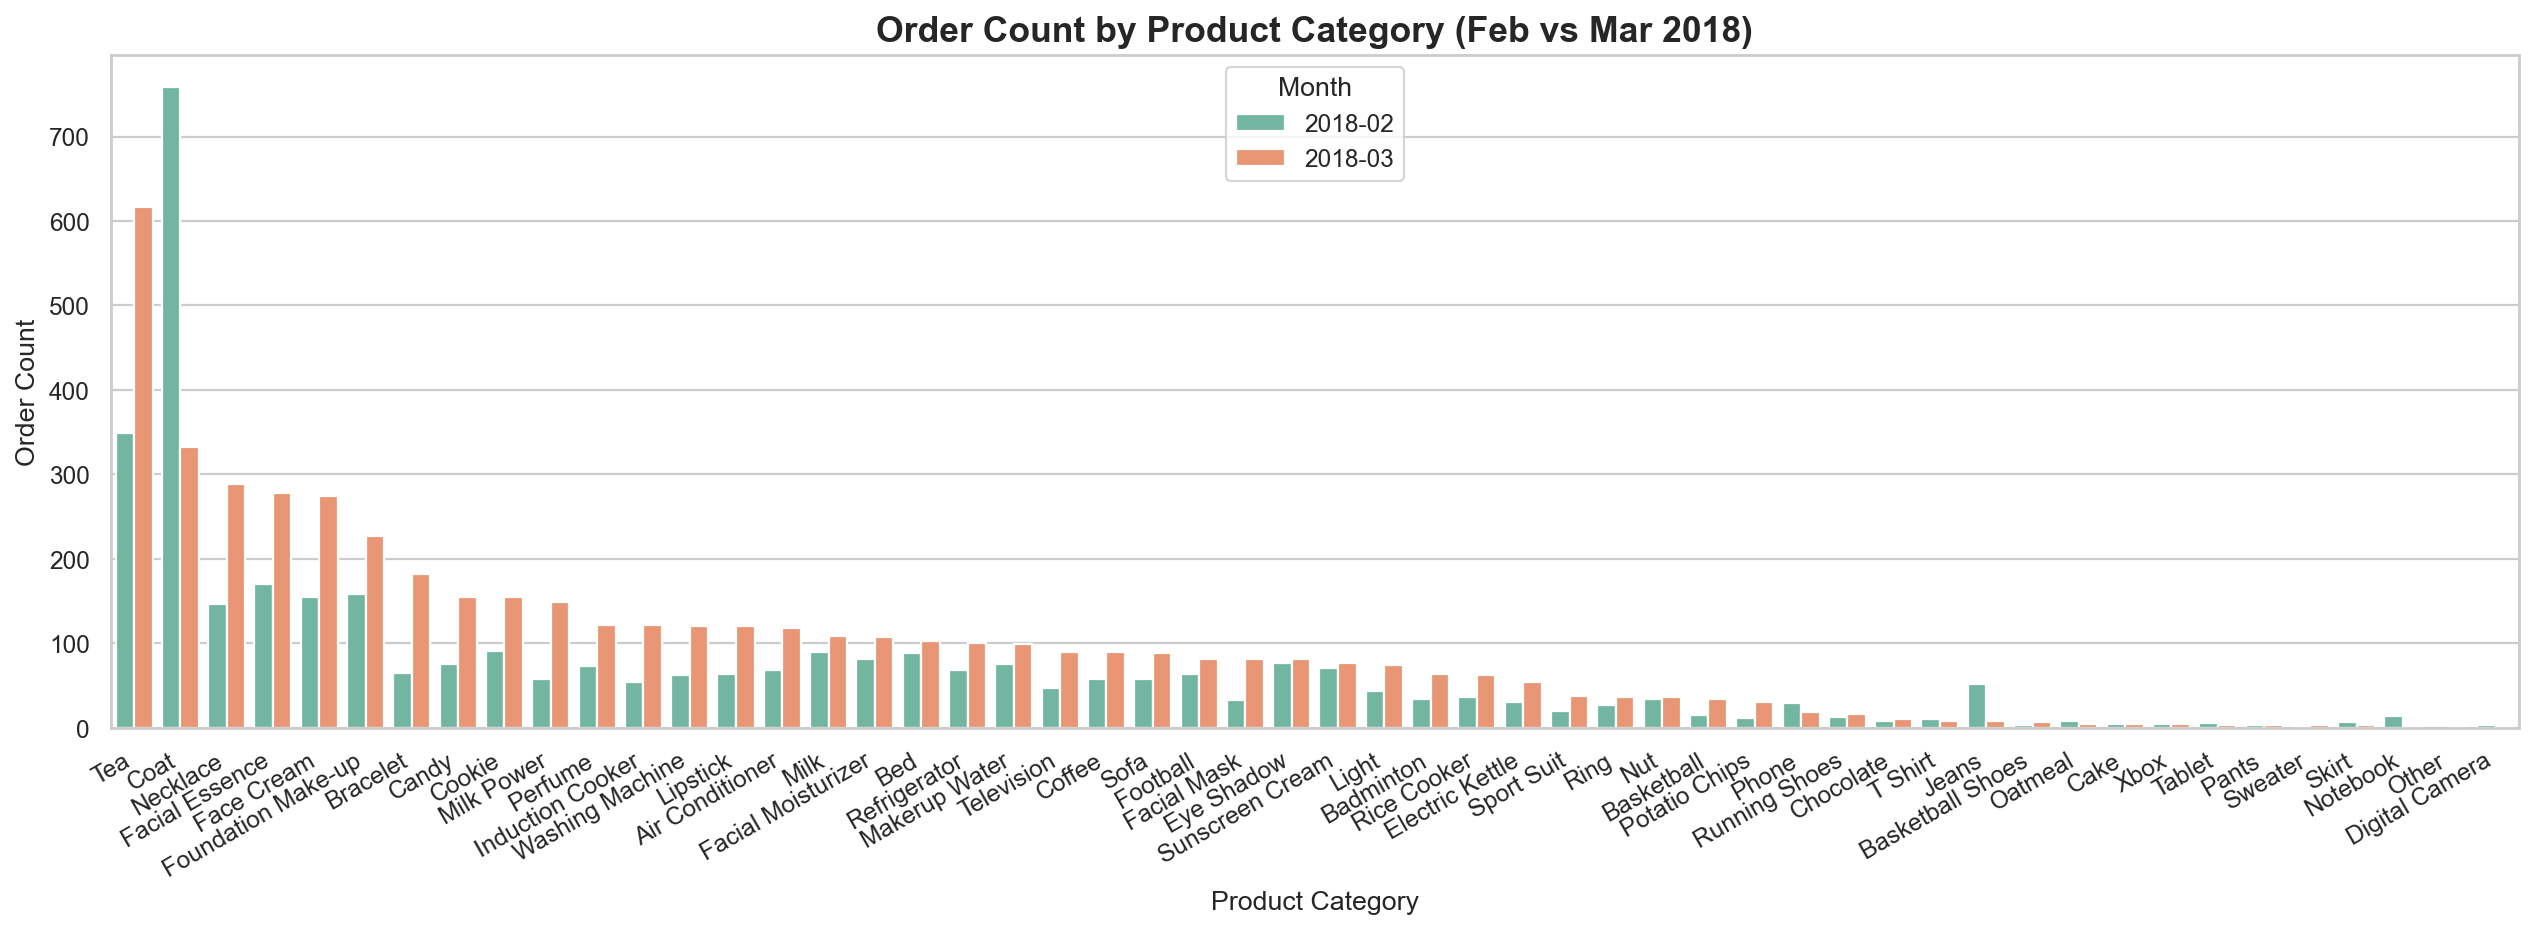

In [38]:
consumer_order = df[df['type'] == 'Order']
    
    # Calculate category counts per month
order_category_month = consumer_order.groupby(['action_month', 'category']).size().reset_index(name='order_count')

    # Sort categories by March orders for consistent x-axis
march_order = order_category_month[order_category_month['action_month'] == '2018-03']
top_categories = march_order.sort_values(by='order_count', ascending=False)['category']


# Plot with custom style
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")

barplot = sns.barplot(
    data=order_category_month,
    x='category',
    y='order_count',
    hue='action_month',
    order=top_categories,
    palette=palette
)

# Customize plot
plt.title('Order Count by Product Category (Feb vs Mar 2018)', fontsize=16, weight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Month')
plt.tight_layout()

# Save the figure
output_path = "order_category_comparison.png"
plt.savefig(output_path, dpi=300)
plt.show()

### Monthly Sales Comparison by Product Category (Feb vs Mar 2018)
The bar chart compares the number of orders across different product categories in February and March 2018.

Key Observations:
- Most categories saw higher order volume in March compared to February, indicating a post–Chinese New Year recovery in consumer activity.

- Notable exceptions where February sales outperformed March include: Jackets, Mobile Phones, Jeans, Notepads. 
- While March recorded more total orders in most categories, this does not directly imply higher profitability.The categories that performed better in February (e.g., mobile phones and jackets) are typically higher-value items. Therefore, even if fewer units were sold in February, the total revenue or profit could still be higher due to greater average selling prices.



In [39]:
monthly_metrics = []

for month, group in df.groupby('action_month'):
    #Total Page view
    pv = group[group['type'] == 'PageView']['customer_id'].count()
    #Total Unique visitors
    uv = group['customer_id'].nunique()
    #Number of users making purchases
    user_pay = group[group['type'] == 'Order']['customer_id'].unique()
    user_pay_count = len(user_pay)
    #Avg Page view per day
    avg_pv_per_day = pv / group['action_date'].nunique() if group['action_date'].nunique() > 0 else 0
    #Page view per user
    pv_per_user = pv / uv if uv > 0 else 0
    #Page view from users who paid
    pv_pay = group[group['customer_id'].isin(user_pay) & (group['type'] == 'PageView')].shape[0]
    #Percentage of Page view from users who paid
    pv_pay_pct=pv_pay/pv
    # Percentage of users who paid
    user_pay_rate = user_pay_count / uv if uv > 0 else 0

    monthly_metrics.append({
        'Month': month,
        'PageViews': pv,
        'UniqueVisitors': uv,
        'AvgPV_per_Day': avg_pv_per_day,
        'PayingUsers': user_pay_count,
        'PayUserRate': user_pay_rate,
        'AvgPV_per_User': pv_per_user,
        'PV_from_PayingUsers': pv_pay,
        'pct_PV_from_PayingUsers':pv_pay_pct
       

    })

metrics_m = pd.DataFrame(monthly_metrics)
metrics_m = metrics_m.sort_values(by='Month')
metrics_m

Month  PageViews  UniqueVisitors  AvgPV_per_Day  PayingUsers  \
0  2018-02      68877           61932    2459.892857         3572   
1  2018-03      66433           61559    2143.000000         4880   

   PayUserRate  AvgPV_per_User  PV_from_PayingUsers  pct_PV_from_PayingUsers  
0     0.057676        1.112139                  374                 0.005430  
1     0.079274        1.079176                  472                 0.007105

In [40]:

metrics_transposed = metrics_m.set_index('Month').T

# Calculate MoM change from Feb to Mar 
feb = metrics_transposed.columns[0]
mar = metrics_transposed.columns[1]

metrics_transposed['MoM (Mar vs Feb)%'] = (
    (metrics_transposed[mar] - metrics_transposed[feb]) / metrics_transposed[feb]
).round(4) * 100  # percentage

metrics_transposed.index.name = 'Metric'

metrics_transposed

Month                         2018-02       2018-03  MoM (Mar vs Feb)%
Metric                                                                
PageViews                68877.000000  66433.000000              -3.55
UniqueVisitors           61932.000000  61559.000000              -0.60
AvgPV_per_Day             2459.892857   2143.000000             -12.88
PayingUsers               3572.000000   4880.000000              36.62
PayUserRate                  0.057676      0.079274              37.45
AvgPV_per_User               1.112139      1.079176              -2.96
PV_from_PayingUsers        374.000000    472.000000              26.20
pct_PV_from_PayingUsers      0.005430      0.007105              30.85

### Monthly E-commerce Performance Insights (February → March)

#### 1. User Engagement Metrics

- **Total PageViews** dropped by **3.55%**, despite March having more days than February.  
  This points to a decrease in browsing behavior overall.

- **Unique Visitors** declined slightly by **0.60%**, suggesting stable platform reach.

- **Average PageViews per Day** fell by **12.88%**, indicating lower daily engagement levels.

Chinese New Year in 2018 started on **February 16** and lasted for a week. It’s likely that browsing activity spiked in the days leading up to the holiday due to gift shopping and pre-festival preparations.  
The drop during and after the holiday may be due to store closures and reduced activity. March appears to mark a gradual return to normal activity levels.

---

#### 2. Customer Conversion Metrics

- **Number of Paying Users** rose by **36.62%**.

- **Paying User Rate** increased from **5.76%** to **7.93%**, showing a **37.45%** gain.

- **PageViews from Paying Users** went up by **26.20%**, suggesting more of the browsing activity translated into purchases.

Even though fewer people were browsing, those who did were more likely to make a purchase. This shift could reflect post-holiday restocking behavior or March-specific promotions.

---

#### 3. Behavior per User

- **Average PageViews per User** decreased by **2.96%**, suggesting shorter browsing sessions.

- **Percentage of PageViews from Paying Users** increased by **30.85%**, showing more engagement from transaction-ready users.

Users in March appeared more purposeful—while traffic was lower, the intent to buy was higher.

---

### Summary of Platform Performance

- Engagement metrics dropped in March after the Chinese New Year, but **conversion rates and transaction volume rose**.
- February likely benefited from pre-holiday shopping, while March reflected a **return to routine consumption**.
- March’s lower traffic was offset by **higher conversion efficiency**.

**Recommendations**:
- Leverage the post-holiday momentum with campaigns targeted at returning users.
- In future years, consider launching marketing initiatives in early February to take full advantage of pre-Chinese New Year demand.


## 4.3 Repurchase Rate Analysis

In [41]:
customer_purchase=consumer_order.groupby('customer_id')['action_id'].nunique().reset_index(name='purchase_count').sort_values('purchase_count', ascending=False)

In [42]:
purchase_distribution=customer_purchase.groupby('purchase_count')['customer_id'].nunique().reset_index(name='count').sort_values('purchase_count')
purchase_distribution


purchase_count  count
0               1   8426
1               2     20
2               3      1

In [43]:
repurchasers = purchase_distribution[purchase_distribution['purchase_count'] > 1]['count'].sum()
total_customers = purchase_distribution['count'].sum()
# Repurchase rate
repurchase_rate = repurchasers / total_customers

print(f"Repurchase rate is {repurchase_rate:.2%}")

Repurchase rate is 0.25%


### Repurchase Behavior

- The repurchase rate is notably low, with the majority of customers making only one purchase.

#### Recommendation

- **Introduce retention campaigns** such as targeted re-engagement emails, limited-time discounts for second purchases, or loyalty point systems.
- **Analyze first-time buyer behavior** to identify drop-off reasons and address them through improved user experience or personalized follow-ups.
- **Bundle offers or subscriptions** can incentivize recurring purchases, especially for consumable or frequently needed products.
- **Segment customers** by product category or purchase time to identify groups with higher repurchase potential and tailor strategies accordingly.


## 4.4 Conversion Rate Analysis

In [44]:
event_distribution = df['type'].value_counts().reset_index()
event_distribution.columns = ['Event Type', 'Count']
event_distribution['Rate'] = (event_distribution['Count'] / event_distribution['Count'].sum()).round(3)


event_distribution = event_distribution.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display as styled bar chart 
event_distribution.style.bar(subset=['Rate'], color='skyblue').format({'Rate': "{:.1%}"})

Among all recorded user behaviors in February and March, Page Views account for 91%, indicating that the majority of users are browsing without taking further action. In contrast, only 5.7% of interactions result in actual Orders, highlighting a significant drop-off from attention to conversion. Additionally, engagement actions such as Comments and Follows occur at notably low rates.

Recommendation:
To strengthen user retention and conversion, JD E-commerce should focus on improving interactive engagement features within the app—such as incentivizing product reviews, social sharing, or following stores. Enhancing these touchpoints may drive higher user stickiness, build community interaction, and potentially lift conversion rates across the funnel.

In [45]:


# Calculate unique users at each stage
event_counts = {
    'PageView': df[df['type'] == 'PageView']['customer_id'].nunique(),
    'Order': df[df['type'] == 'Order']['customer_id'].nunique(),
    'Comment': df[df['type'] == 'Comment']['customer_id'].nunique()
}

# Build funnel data
funnel_order = ['PageView', 'Order', 'Comment']
funnel_data = [(stage, event_counts[stage]) for stage in funnel_order]

# Create funnel chart
funnel = (
    Funnel()
    .add(
        "Conversion", 
        funnel_data,
        sort_='descending',  # largest at top
        label_opts=opts.LabelOpts(position="inside")
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="JD E-commerce Conversion Funnel"),
        tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{b}: {c} users")
    )
)


funnel.render_notebook()  # in Jupyter
# funnel.render("funnel_chart.html")  # to export as interactive HTML


The conversion rate from browsing to ordering to commenting is notably low — starting from 105,072 PageViews, only 8,447 users placed an order (8.0% conversion), and just 3,068 users left a comment (2.9% conversion from PageViews, or 36.3% from orders). This highlights a significant drop-off across each stage of the user engagement funnel.

To improve conversion at each stage, the company should develop targeted marketing strategies tailored to distinct consumer segments. A foundational step is to build and leverage consumer profiles, which combine:

- Demographic data (age, gender, income),

- Geographic data (location),

- Psychographic data (lifestyle, interests, values),

- Behavioral data (purchase history, browsing patterns).

Such profiles enable the business to deliver personalized promotions, optimize user journeys, and design retargeting strategies for high-potential but inactive users—ultimately driving higher engagement and purchase intent.